In [11]:
from mne.filter import filter_data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pyedflib
import numpy as np
from datetime import timedelta
from scipy.signal import find_peaks_cwt
from scipy.stats import spearmanr

import seaborn as sns
import scipy.stats

from os import listdir
    #method listdir() returns a list containing the names of the entries in the directory given by path.
from os.path import isfile, join
    #returns true if file in path is an existing regular file



In [57]:
## !! set correct working directory
import os
path="/Users/jeroenhabets/Documents/pilot1_workdata"
os.chdir(path)
os.getcwd() #check

'/Users/jeroenhabets/Documents/pilot1_workdata'

In [58]:
## write cell to read in relevant .csv datafile from data preparation
esmFused = pd.read_csv('prepDataESM11.csv')

In [59]:
esmFused.keys()

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_problemless',
       'mobility_well', 'sit_still', 'speech_well', 'walk_well', 'tremor',
       'slowness', 'stiffness', 'muscle_tension', 'dyskinesia', 'sanpar_onoff',
       'sanpar_medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n',
       'beepno_n', 'duration', 'castorID', 'dateOnly', 'validDay',
       'meanPosAff', 'meanNegAff', 'OnOffnew', 'newBrady', 'flucPresence',
       'phenotype', 'DBS', 'subjno_MOR', 'mor_sleptwell', 'often_awake',
       'mor_rested', 'tired_phys', 'tired_ment', '_datetime_MOR',
       '_datetime_e_MOR', 'duration_MOR', 'validDay_MOR', 'subjno_EVE',
       'many_offs', 'long_offs', 'walk_well_eve', 'clothing_eve',
       'eat_well_eve', 'personalcare_eve', 'household_eve', '

In [7]:
# check whether completion % are the same for esmFused as esmValid
for id in esmFused.castorID.unique():
    print('Percentage beeps completed of pt',id,'is',(round(len(esmFused[esmFused['castorID']==id])/98*100)),'%.')

Percentage beeps completed of pt 110001 is 79 %.
Percentage beeps completed of pt 110003 is 76 %.
Percentage beeps completed of pt 110002 is 98 %.
Percentage beeps completed of pt 110004 is 80 %.
Percentage beeps completed of pt 110006 is 80 %.
Percentage beeps completed of pt 110005 is 74 %.
Percentage beeps completed of pt 110007 is 54 %.
Percentage beeps completed of pt 110008 is 62 %.
Percentage beeps completed of pt 110009 is 63 %.
Percentage beeps completed of pt 110010 is 79 %.
Percentage beeps completed of pt 110011 is 92 %.


Percentage beeps completed of pt 110001 is 76 %.
Percentage beeps completed of pt 110002 is 98 %.
Percentage beeps completed of pt 110003 is 76 %.
Percentage beeps completed of pt 110004 is 80 %.
Percentage beeps completed of pt 110005 is 74 %.
Percentage beeps completed of pt 110006 is 80 %.

All patients filled in over 2/3 of beeps, no patients have to be excluded because of too low completed beep-percentage.

Make demographic table of population
Age, disease duration, phenotype, LED?, number of medication moments?, presence of fluctuations, DBS?, completion %, average completion duration? (with reference to feasibility article?)

In [61]:
esmFused.keys()

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_problemless',
       'mobility_well', 'sit_still', 'speech_well', 'walk_well', 'tremor',
       'slowness', 'stiffness', 'muscle_tension', 'dyskinesia', 'sanpar_onoff',
       'sanpar_medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n',
       'beepno_n', 'duration', 'castorID', 'dateOnly', 'validDay',
       'meanPosAff', 'meanNegAff', 'OnOffnew', 'newBrady', 'flucPresence',
       'phenotype', 'DBS', 'subjno_MOR', 'mor_sleptwell', 'often_awake',
       'mor_rested', 'tired_phys', 'tired_ment', '_datetime_MOR',
       '_datetime_e_MOR', 'duration_MOR', 'validDay_MOR', 'subjno_EVE',
       'many_offs', 'long_offs', 'walk_well_eve', 'clothing_eve',
       'eat_well_eve', 'personalcare_eve', 'household_eve', '

In [ ]:
### ANALYZING PLAN ###

### calculate % of variance in item X, explained by item Y

# start with descriptive stats on whole group -> construct and converg validity
# add std errors
# do first derivative analyses (xx change in item X goes together with xx change in item Y)
# !! big advantage of derivative analyses is the exclusion of the influence of the individual mean/baseline.
# differences are aproximately same between patients, when they usually answer 7 or 4-5 .. 

# Spearman correlation of (for example) FlucPresence(0/1) with mood_well, 
# squared R (p says something about sign (Bonferroni correct later)) -> explained variances
# So: xx % of variance in item mood_well in total population is explained by item FlucPres.

# ??? BdG? how much do fixed effect models add to these analyses?

#
# check how many of the relevant items are significantly correlated with one of the subgroup-dividers
# 

([<matplotlib.axis.XTick at 0x1c17415320>,
 <a list of 30 Text xticklabel objects>)

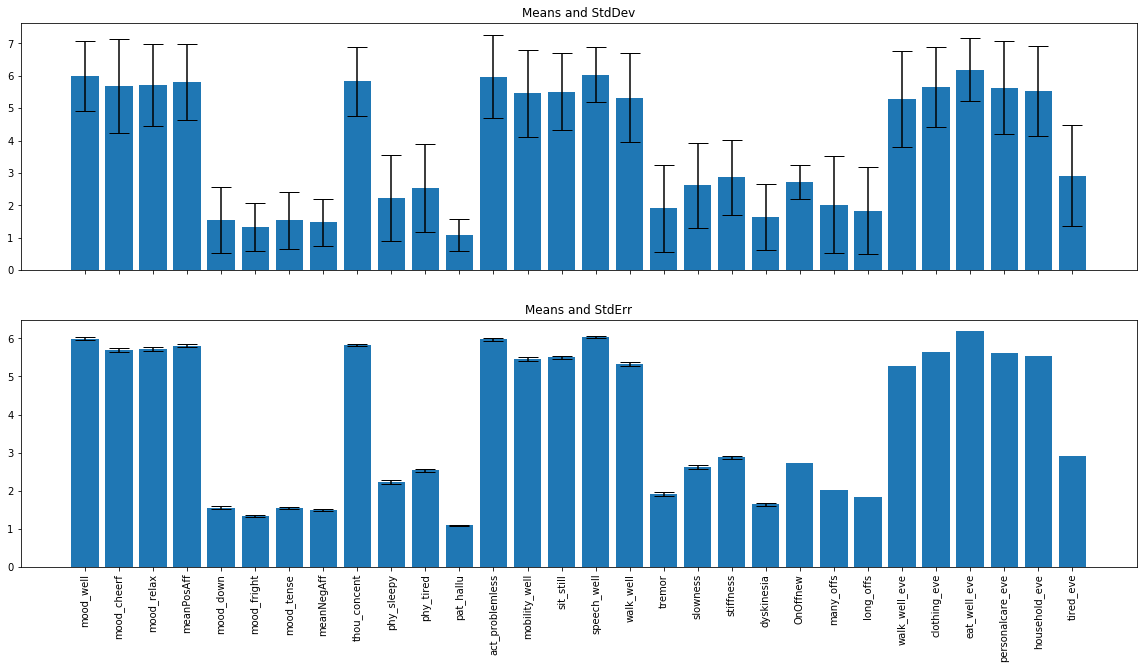

In [82]:
## part 1: ANALYSIS OF WHOLE GROUP ##

# barplots of means with std dev whiskers and sign brackets (wilcoxon)



items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']

means = np.zeros(len(items))
stds = np.zeros(len(items))
sems = np.zeros(len(items))

for item in range(len(items)):
    means[item] = np.mean(esmFused[items[item]])
    stds[item] = np.std(esmFused[items[item]])
    sems[item] = scipy.stats.sem(esmFused[items[item]])

# plot 2 barcharts, 1 with stddev, 1 with sem
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, squeeze=True,figsize=(20,10))
ax1.bar(range(len(means)), means, yerr=stds, tick_label=items, capsize=10)
ax1.set_title('Means and StdDev')
ax2.bar(range(len(means)), means, yerr=sems, tick_label=items, capsize=10)
ax2.set_title('Means and StdErr')
plt.xticks(range(len(means)), rotation = 'vertical')

# # and plot it on ONE bar chart
# plt.figure(figsize=(20,7))
# plt.bar(range(len(means)), means, yerr=stds, tick_label=items, capsize=10)
# plt.xticks(range(len(means)), rotation = 'vertical')
# plt.legend(('total'))
# plt.show()

# plt.bar(np.arange(len(items)),means, align='center', color='g')
# plt.bar(np.arange(len(items)),listCorrSq, align='edge', color='r')


In [104]:
# start with descriptive stats on whole group -> construct and converg validity
# add std errors
# do first derivative analyses (xx change in item X goes together with xx change in item Y)

def createDerivatives(listItems): # insert list of items (strings) to be processed
    for item in listItems:
    
        esmFused[item+'_Der'] = np.zeros(len(esmFused[item])) # create new variable by adding _Der to existing variable name

        for beep in range(1,len(esmFused[item])): # exclude line 0 since there is no previous value
            esmFused[item+'_Der'][beep] = esmFused[item][beep]-esmFused[item][beep-1]

        # correct for first beeps of days -> should be 0
        for id in esmFused.castorID.unique():
            for day in esmFused[esmFused['castorID']==id]['dateOnly'].unique():
                esmFused[(esmFused['castorID']==id) & (esmFused['dateOnly']==day)].iloc[0][item+'_Der'] = 0
        # add print(item) to check progress

In [105]:
derivItems = ['meanPosAff','meanNegAff', 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 
              'walk_well', 'tremor', 'slowness', 'stiffness', 'dyskinesia', 'OnOffnew']
createDerivatives(derivItems)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


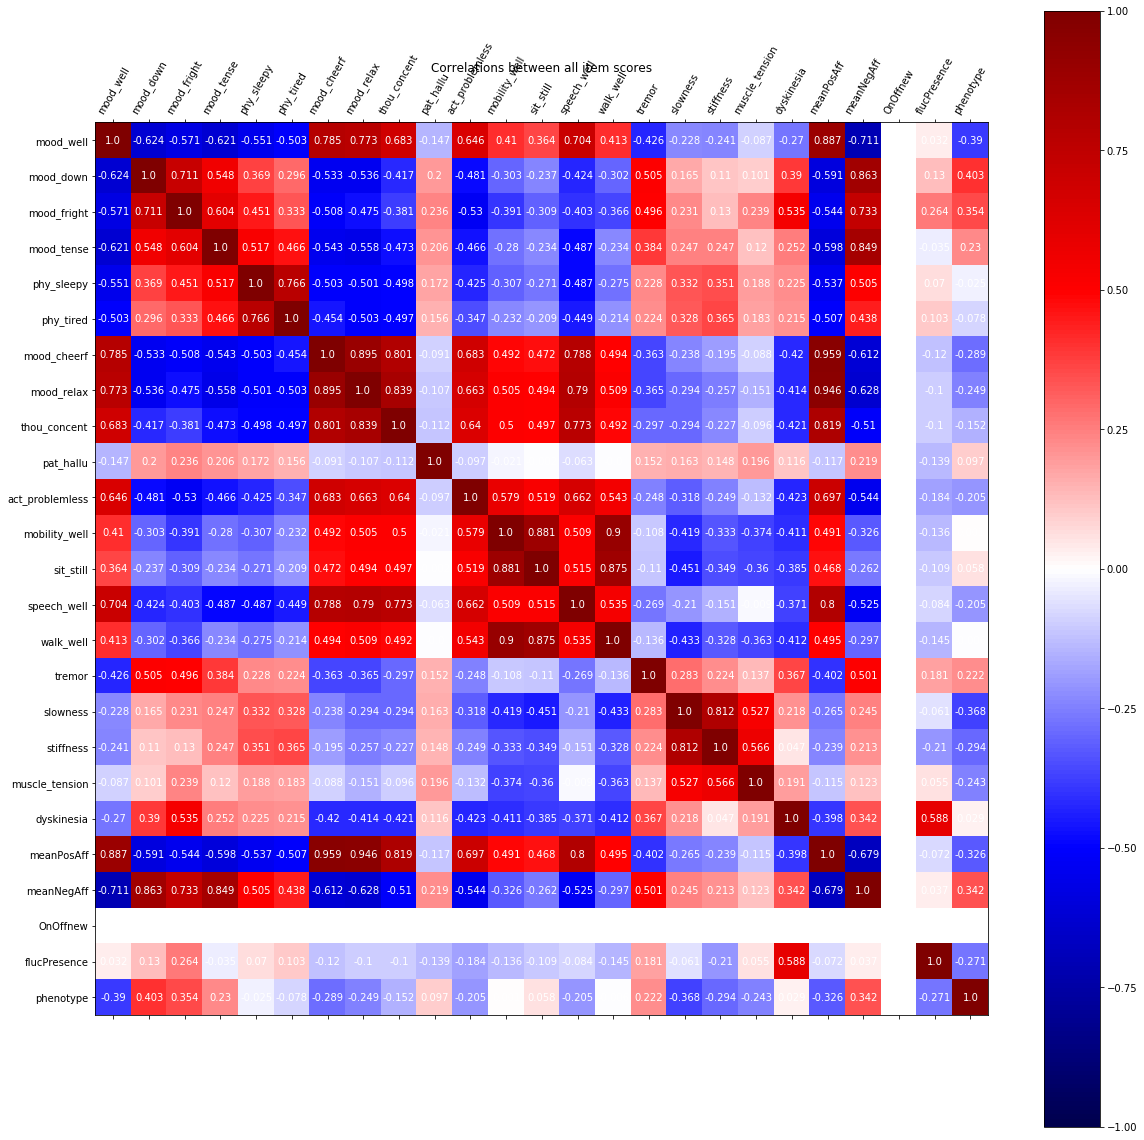

In [126]:
# create heatmap or confusion matrix for correlation between all esm-items
# for ALL SUBJECTS


# create list with relevant ESM items
corrItemList = ['mood_well', 'mood_down', 'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax',
 'thou_concent', 'pat_hallu', 'act_problemless',
       'mobility_well', 'sit_still', 'speech_well', 'walk_well', 'tremor',
       'slowness', 'stiffness', 'muscle_tension', 'dyskinesia',  
     'meanPosAff', 'meanNegAff', 'OnOffnew', 'flucPresence', 'phenotype']

# create empty dataframe with correct shape
heatmap = np.zeros((len(corrItemList),len(corrItemList)))

for x in range(len(corrItemList)):
    for y in range(len(corrItemList)):
        heatmap[x,y] = spearmanr(esmFused[corrItemList[x]],esmFused[corrItemList[y]])[0]

plt.figure(figsize=(20,20)) # use to enlarge size of figure 
plt.matshow(heatmap, fignum=1, cmap='seismic', vmin=-1,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
plt.colorbar()
plt.xticks(np.arange(len(corrItemList)), corrItemList, rotation= 60)
plt.yticks(np.arange(len(corrItemList)), corrItemList, rotation= 0)

# Loop over data dimensions and create text annotations.
for i in range(len(corrItemList)):
    for j in range(len(corrItemList)):
        text = plt.text(j, i, round(heatmap[i, j],3),
                       ha="center", va="center", color="w")

plt.title("Correlations between all item scores")
plt.show()

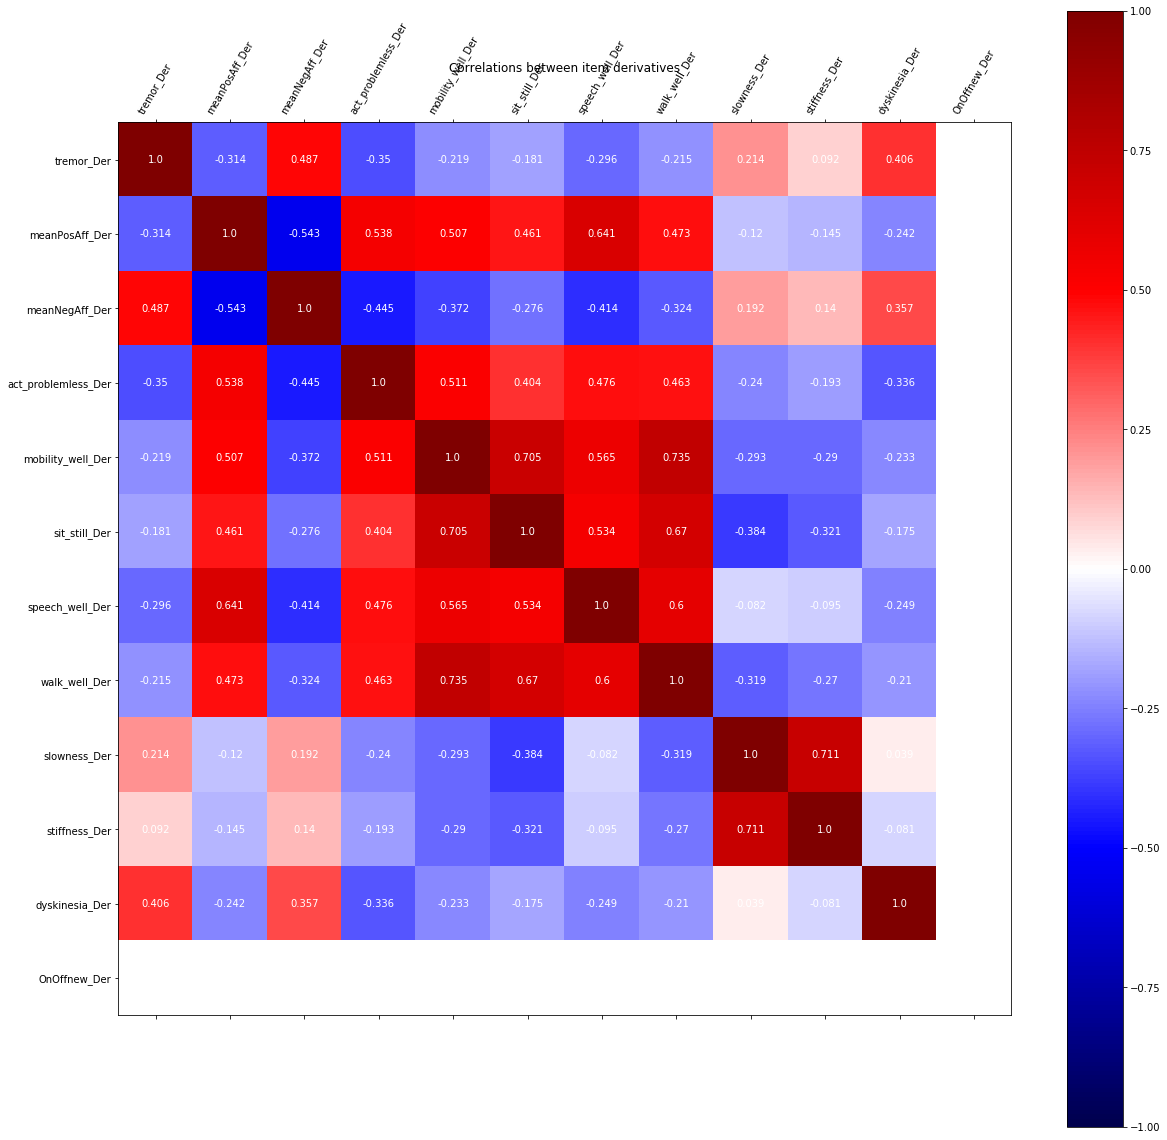

In [110]:
# visualize correlations between new derivitave items

items = ['tremor_Der', 'meanPosAff_Der', 'meanNegAff_Der', 'act_problemless_Der',
       'mobility_well_Der', 'sit_still_Der', 'speech_well_Der',
       'walk_well_Der', 'slowness_Der', 'stiffness_Der', 'dyskinesia_Der',
       'OnOffnew_Der']

# create empty dataframe with correct shape
heatmap = np.zeros((len(items),len(items)))

for x in range(len(items)):
    for y in range(len(items)):
        heatmap[x,y] = spearmanr(esmFused[items[x]],esmFused[items[y]])[0]

plt.figure(figsize=(20,20)) # use to enlarge size of figure 
plt.matshow(heatmap, fignum=1, cmap='seismic', vmin=-1,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
plt.colorbar()
plt.xticks(np.arange(len(items)), items, rotation= 60)
plt.yticks(np.arange(len(items)), items, rotation= 0)

# Loop over data dimensions and create text annotations.
for i in range(len(items)):
    for j in range(len(items)):
        text = plt.text(j, i, round(heatmap[i, j],3),
                       ha="center", va="center", color="w")

plt.title("Correlations between item derivatives")

plt.show()

In [159]:
# check direction tremor vs meanAffects

print(spearmanr(esmFused[esmFused['flucPresence']==1]['tremor'],esmFused[esmFused['flucPresence']==1]['meanPosAff_Der']))
print(spearmanr(esmFused[esmFused['flucPresence']==1]['tremor'],esmFused[esmFused['flucPresence']==1]['meanNegAff_Der']))
print(spearmanr(esmFused[esmFused['flucPresence']==1]['tremor_Der'],esmFused[esmFused['flucPresence']==1]['meanPosAff']))
print(spearmanr(esmFused[esmFused['flucPresence']==1]['tremor_Der'],esmFused[esmFused['flucPresence']==1]['meanNegAff']))

SpearmanrResult(correlation=-0.1000127211293496, pvalue=0.07133100432011757)
SpearmanrResult(correlation=0.26296562251903716, pvalue=1.4739766489009148e-06)
SpearmanrResult(correlation=-0.3710708826624262, pvalue=4.426681683146914e-12)
SpearmanrResult(correlation=0.38815249405132907, pvalue=3.6403092993641346e-13)


In [226]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [235]:
### calculate explained difference of item A in item B

def explainedDiffTable (listIndepend, listDepend): # Independ are predictors/explainers; Depend are items to be explained
    table = np.zeros((len(listIndepend),len(listDepend)))
    
    for y in range(len(listDepend)):
        for x in range(len(listIndepend)):
            corr = spearmanr(esmFused[listIndepend[x]],esmFused[listDepend[y]])[0]
            table[x, y]=corr*corr

    plt.figure(figsize=(20,20)) # use to enlarge size of figure 
    plt.matshow(table, fignum=1, cmap='BuGn', vmin=0,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
    plt.colorbar(fraction=0.01)
    plt.yticks(np.arange(len(listIndepend)), listIndepend, rotation= 60)
    plt.xticks(np.arange(len(listDepend)), listDepend, rotation= 30)
    

    # Loop over data dimensions and create text annotations.
    for y in range(len(listDepend)):
        for x in range(len(listIndepend)):
            text = plt.text(y, x, round(table[x, y],2),
                           ha="center", va="center", color="k")

#    plt.title("% of variance in item Y, explained by item X")

    plt.show()

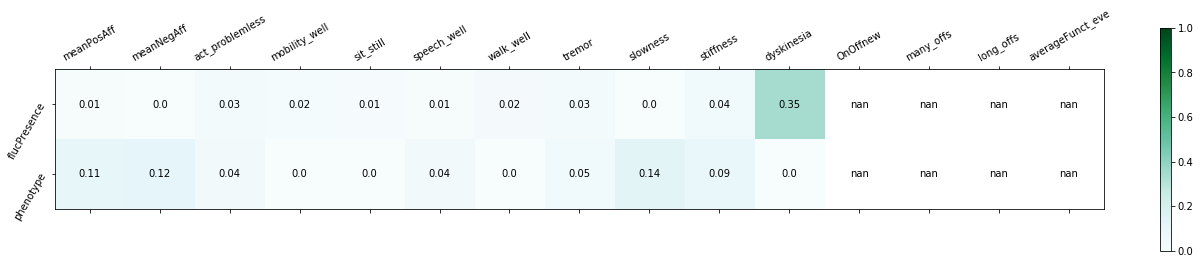

In [237]:
# call explVar function


listIndep = ['flucPresence','phenotype'] # add general info, age, disease duration from castor

listDep = ['meanPosAff','meanNegAff', 'act_problemless', 'mobility_well', 
                                                 'sit_still', 'speech_well', 'walk_well', 'tremor', 'slowness', 
                                                 'stiffness', 'dyskinesia','OnOffnew', 'many_offs', 'long_offs','averageFunct_eve']

explainedDiffTable(listIndep,listDep)



In [ ]:
## discuss with Bianca meaning to this anayses, 
# what can multi leven fixed effect analyses add to these conclusions?

In [ ]:
###################     part 2: SUBGROUP ANALYSES       ###################


# Spearman correlation of (for example) FlucPresence(0/1) with mood_well, 
# squared R (p says something about sign (Bonferroni correct later)) -> explained variances
# So: xx % of variance in item mood_well in total population is explained by item FlucPres.

# ??? BdG? how much do fixed effect models add to these analyses?

#
# check how many of the relevant items are significantly correlated with one of the subgroup-dividers

In [156]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr.any():
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [ ]:

plt.figure()
plt.bar(bars, heights, align='center')
plt.ylim(0, 5)
barplot_annotate_brackets(0, 1, .1, bars, heights, maxasterix=3)
barplot_annotate_brackets(1, 2, .001, bars, heights, maxasterix=3)
barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)

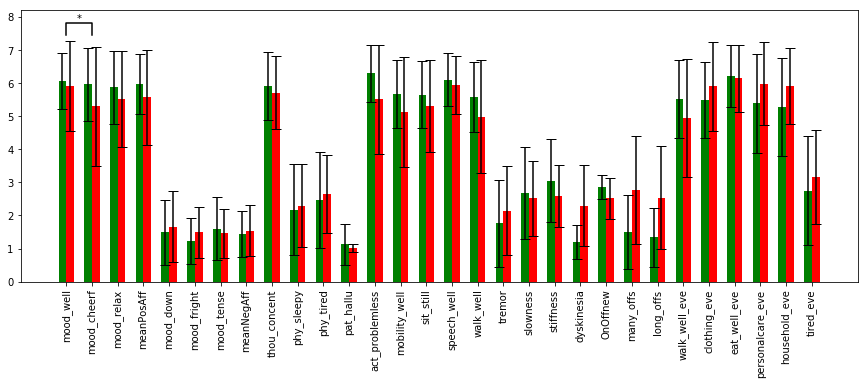

In [166]:

# barplots of means with std dev whiskers

subPop = 'flucPresence'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']


means = np.zeros(len(items))
stds = np.zeros(len(items))
means1 = np.zeros(len(items))
stds1 = np.zeros(len(items))
means2 = np.zeros(len(items))
stds2 = np.zeros(len(items))

for item in range(len(items)):
    means[item] = np.mean(esmFused[items[item]])
    stds[item] = np.std(esmFused[items[item]])
    means1[item] = np.mean(esmFused[esmFused[subPop]==0][items[item]])
    stds1[item] = np.std(esmFused[esmFused[subPop]==0][items[item]])
    means2[item] = np.mean(esmFused[esmFused[subPop]==1][items[item]])
    stds2[item] = np.std(esmFused[esmFused[subPop]==1][items[item]])


# and plot it on a bar chart
plt.figure(figsize=(15,5))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=stds1, capsize=5, tick_label=items)

plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=stds2)
barplot_annotate_brackets(0,1, .01, range(len(means1)), means1, yerr=stds1, maxasterix=3)
# ?! how to put brackets over 2 bars in mood_well instead over 0-1

plt.xticks(range(len(means1)), rotation = 'vertical')
plt.show()


## TO DO: INCLUDE SIGNIFICANCE BRACKETS



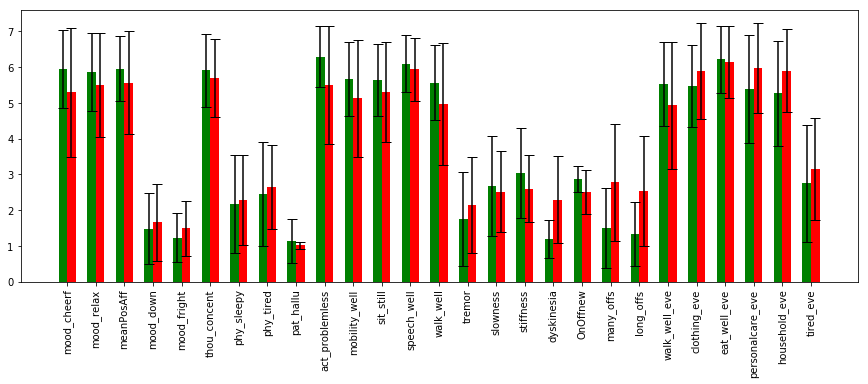

Number of significant differences in flucPresence are 27
Non-significant differences for: ['mood_well', 'mood_tense', 'meanNegAff']


In [168]:
# barplots of means with std dev whiskers, only significant differences (< 0.05)

subPop = 'flucPresence'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']

means1 = []
stds1 = []
means2 = []
stds2 = []
sigItems = []
nonsigs = []

for item in range(len(items)):
    
    if (scipy.stats.mannwhitneyu(esmFused[esmFused[subPop]==0][items[item]], esmFused[esmFused[subPop]==1][items[item]])[1]) < 0.05:
        means1.append(np.mean(esmFused[esmFused[subPop]==0][items[item]]))
        stds1.append(np.std(esmFused[esmFused[subPop]==0][items[item]]))
        means2.append(np.mean(esmFused[esmFused[subPop]==1][items[item]]))
        stds2.append(np.std(esmFused[esmFused[subPop]==1][items[item]]))
        sigItems.append(items[item])
    else:
        nonsigs.append(items[item])


# and plot it on a bar chart
plt.figure(figsize=(15,5))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=stds1, capsize=5, tick_label=sigItems)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=stds2)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.show()

print('Number of significant differences in',subPop,'are',len(sigItems))
print('Non-significant differences for:',nonsigs)


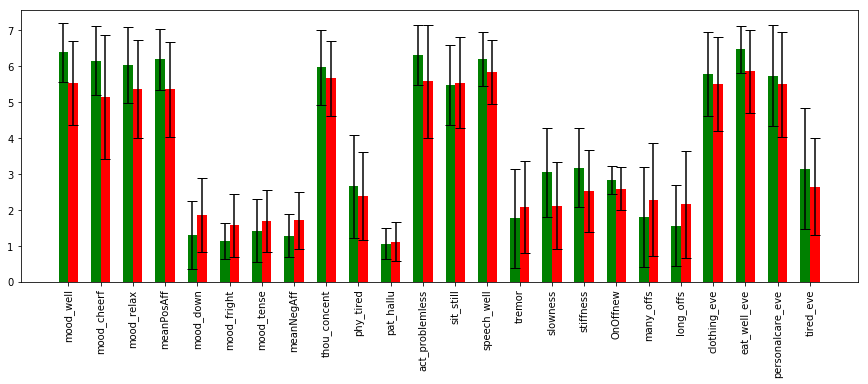

Number of significant differences in phenotype are 24
Non-significant differences for: ['phy_sleepy', 'mobility_well', 'walk_well', 'dyskinesia', 'walk_well_eve', 'household_eve']


In [170]:
# barplots of means with std dev whiskers, only significant differences (< 0.05)

subPop = 'phenotype'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']

means1 = []
stds1 = []
means2 = []
stds2 = []
sigItems = []
nonsigs = []

for item in range(len(items)):
    
    if (scipy.stats.mannwhitneyu(esmFused[esmFused[subPop]==0][items[item]], esmFused[esmFused[subPop]==1][items[item]])[1]) < 0.05:
        means1.append(np.mean(esmFused[esmFused[subPop]==0][items[item]]))
        stds1.append(np.std(esmFused[esmFused[subPop]==0][items[item]]))
        means2.append(np.mean(esmFused[esmFused[subPop]==1][items[item]]))
        stds2.append(np.std(esmFused[esmFused[subPop]==1][items[item]]))
        sigItems.append(items[item])
    else:
        nonsigs.append(items[item])


# and plot it on a bar chart
plt.figure(figsize=(15,5))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=stds1, capsize=5, tick_label=sigItems)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=stds2)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.show()

print('Number of significant differences in',subPop,'are',len(sigItems))
print('Non-significant differences for:',nonsigs)




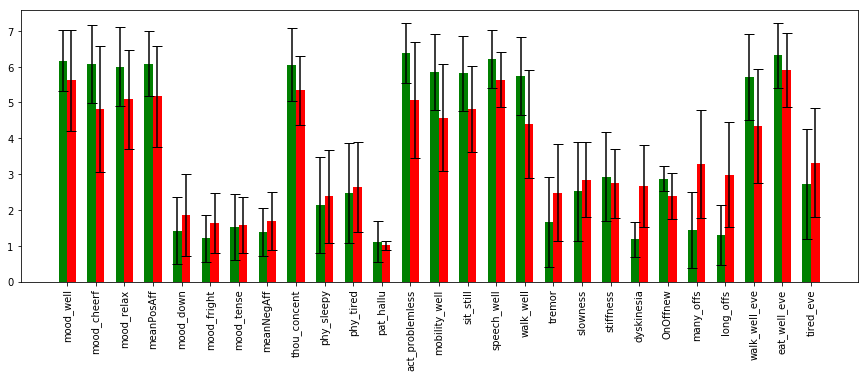

Number of significant differences in DBS are 27
Non-significant differences for: ['clothing_eve', 'personalcare_eve', 'household_eve']


In [171]:
# barplots of means with std dev whiskers, only significant differences (< 0.05)

subPop = 'DBS'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']

means1 = []
stds1 = []
means2 = []
stds2 = []
sigItems = []
nonsigs = []

for item in range(len(items)):
    
    if (scipy.stats.mannwhitneyu(esmFused[esmFused[subPop]==0][items[item]], esmFused[esmFused[subPop]==1][items[item]])[1]) < 0.05:
        means1.append(np.mean(esmFused[esmFused[subPop]==0][items[item]]))
        stds1.append(np.std(esmFused[esmFused[subPop]==0][items[item]]))
        means2.append(np.mean(esmFused[esmFused[subPop]==1][items[item]]))
        stds2.append(np.std(esmFused[esmFused[subPop]==1][items[item]]))
        sigItems.append(items[item])
    else:
        nonsigs.append(items[item])


# and plot it on a bar chart
plt.figure(figsize=(15,5))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=stds1, capsize=5, tick_label=sigItems)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=stds2)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.show()

print('Number of significant differences in',subPop,'are',len(sigItems))
print('Non-significant differences for:',nonsigs)





In [142]:
## test for significance difference between subgroups regarding 1 item
# scipy wilcoxon rank doesnt process 2 sets with unequal N; so MannWhitneyU is alternative

print('act_problemless',scipy.stats.mannwhitneyu(esmFused[esmFused[subPop]==0]['act_problemless'], esmFused[esmFused[subPop]==1]['act_problemless'])[1])

print('dyskinesia',scipy.stats.mannwhitneyu(esmFused[esmFused[subPop]==0]['dyskinesia'], esmFused[esmFused[subPop]==1]['dyskinesia']))

print('meanNegAff',scipy.stats.mannwhitneyu(esmFused[esmFused[subPop]==0]['meanNegAff'], esmFused[esmFused[subPop]==1]['meanNegAff']))


act_problemless 7.028718889586432e-08
dyskinesia MannwhitneyuResult(statistic=32218.5, pvalue=1.0317509113782962e-63)
meanNegAff MannwhitneyuResult(statistic=77151.5, pvalue=0.1454775155386464)


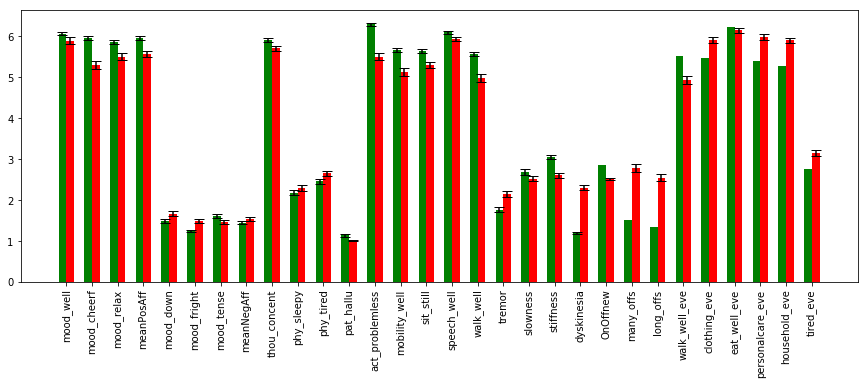

In [134]:
# barplots of means with std ERRORS whiskers and sign brackets (wilcoxon)

subPop = 'flucPresence'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']


means = np.zeros(len(items))
sems = np.zeros(len(items))
means1 = np.zeros(len(items))
sems1 = np.zeros(len(items))
means2 = np.zeros(len(items))
sems2 = np.zeros(len(items))

for item in range(len(items)):
    means[item] = np.mean(esmFused[items[item]])
    sems[item] = scipy.stats.sem(esmFused[items[item]])
    means1[item] = np.mean(esmFused[esmFused[subPop]==0][items[item]])
    sems1[item] = scipy.stats.sem(esmFused[esmFused[subPop]==0][items[item]])
    means2[item] = np.mean(esmFused[esmFused[subPop]==1][items[item]])
    sems2[item] = scipy.stats.sem(esmFused[esmFused[subPop]==1][items[item]])


# and plot it on a bar chart
plt.figure(figsize=(15,5))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=sems1, capsize=5, tick_label=items)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=sems2)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.show()

## TO DO: INCLUDE SIGNIFICANCE BRACKETS




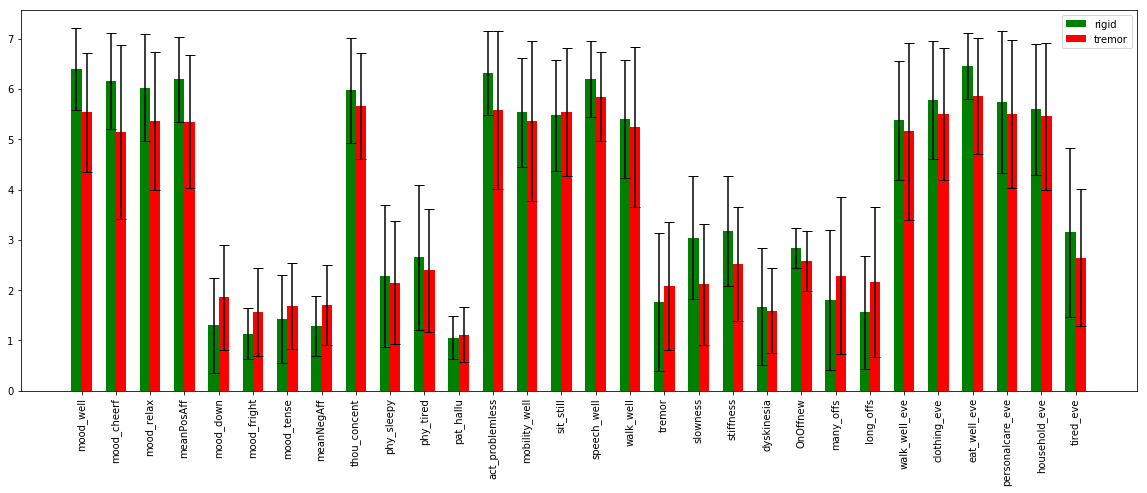

In [68]:
# barplots of means with std dev whiskers and sign brackets (wilcoxon)

subPop = 'phenotype'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']


means = np.zeros(len(items))
stds = np.zeros(len(items))
means1 = np.zeros(len(items))
stds1 = np.zeros(len(items))
means2 = np.zeros(len(items))
stds2 = np.zeros(len(items))

for item in range(len(items)):
    means[item] = np.mean(esmFused[items[item]])
    stds[item] = np.std(esmFused[items[item]])
    means1[item] = np.mean(esmFused[esmFused[subPop]==0][items[item]])
    stds1[item] = np.std(esmFused[esmFused[subPop]==0][items[item]])
    means2[item] = np.mean(esmFused[esmFused[subPop]==1][items[item]])
    stds2[item] = np.std(esmFused[esmFused[subPop]==1][items[item]])


# and plot it on a bar chart
plt.figure(figsize=(20,7))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=stds1, capsize=5, tick_label=items)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=stds2)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.legend(('rigid','tremor'))
plt.show()


## TO DO: INCLUDE SIGNIFICANCE BRACKETS




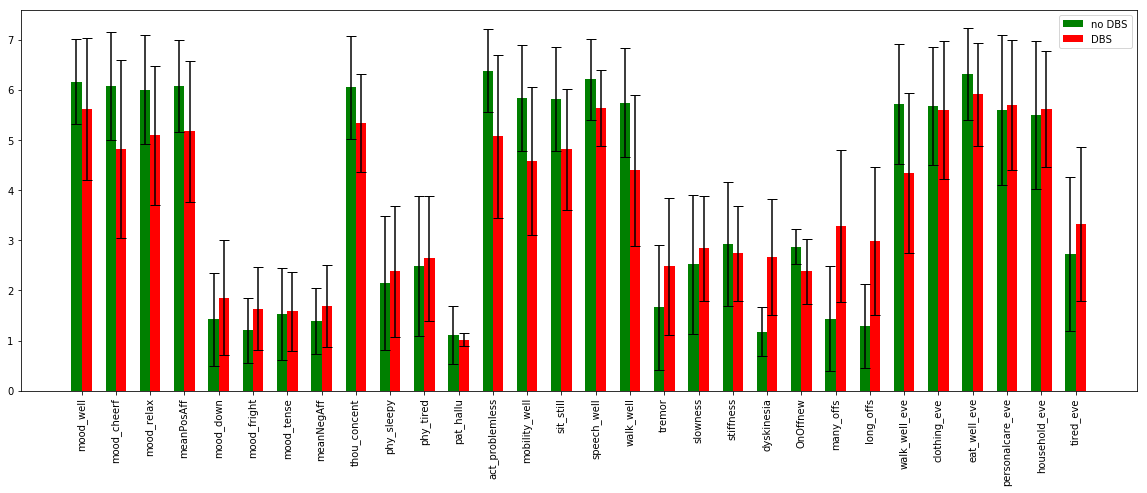

In [67]:
# barplots of means with std dev whiskers and sign brackets (wilcoxon)

subPop = 'DBS'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']


means = np.zeros(len(items))
stds = np.zeros(len(items))
means1 = np.zeros(len(items))
stds1 = np.zeros(len(items))
means2 = np.zeros(len(items))
stds2 = np.zeros(len(items))

for item in range(len(items)):
    means[item] = np.mean(esmFused[items[item]])
    stds[item] = np.std(esmFused[items[item]])
    means1[item] = np.mean(esmFused[esmFused[subPop]==0][items[item]])
    stds1[item] = np.std(esmFused[esmFused[subPop]==0][items[item]])
    means2[item] = np.mean(esmFused[esmFused[subPop]==1][items[item]])
    stds2[item] = np.std(esmFused[esmFused[subPop]==1][items[item]])


# and plot it on a bar chart
plt.figure(figsize=(20,7))
# plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, tick_label=items)
plt.bar(range(len(means1)),means1, width=-0.3, align='edge', color='g',yerr=stds1, capsize=5, tick_label=items)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r', capsize=5, yerr=stds2)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.legend(('no DBS','DBS'))
plt.show()


## TO DO: INCLUDE SIGNIFICANCE BRACKETS




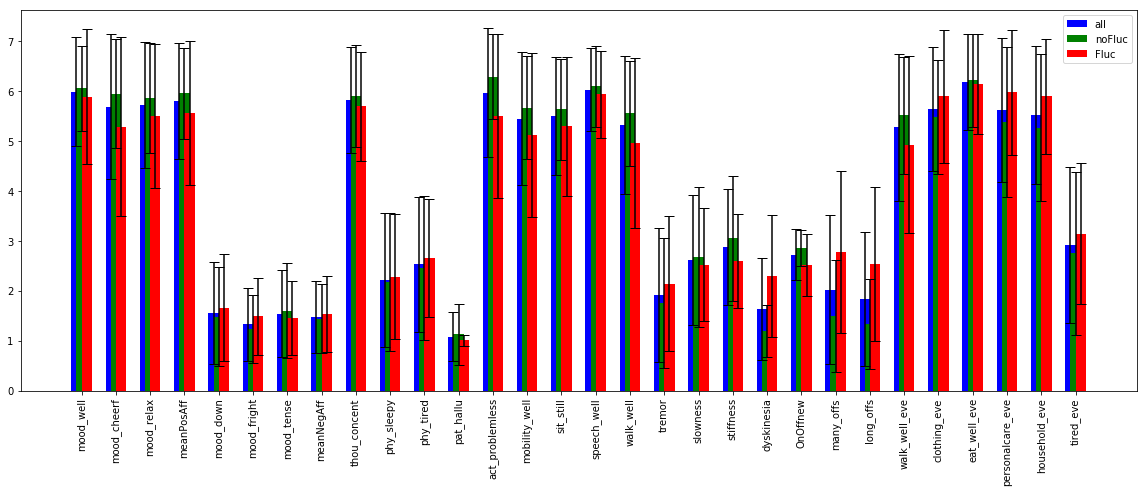

In [73]:
# barplots of means with std dev whiskers and sign brackets (wilcoxon)

subPop = 'flucPresence'

items = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']

means = np.zeros(len(items))
stds = np.zeros(len(items))
means1 = np.zeros(len(items))
stds1 = np.zeros(len(items))
means2 = np.zeros(len(items))
stds2 = np.zeros(len(items))

for item in range(len(items)):
    means[item] = np.mean(esmFused[items[item]])
    stds[item] = np.std(esmFused[items[item]])
    means1[item] = np.mean(esmFused[esmFused[subPop]==0][items[item]])
    stds1[item] = np.std(esmFused[esmFused[subPop]==0][items[item]])
    means2[item] = np.mean(esmFused[esmFused[subPop]==1][items[item]])
    stds2[item] = np.std(esmFused[esmFused[subPop]==1][items[item]])


# and plot it on a bar chart
plt.figure(figsize=(20,7))
plt.bar(range(len(means)), means, width=-0.3, align='edge', color='b', yerr=stds, capsize=5, tick_label=items)
plt.bar(range(len(means1)),means1, width=0.3, align='center', color='g',yerr=stds1, capsize=5, tick_label=items)
plt.bar(range(len(means2)),means2, width=0.3, align='edge', color='r',yerr=stds2, capsize=5)
plt.xticks(range(len(means1)), rotation = 'vertical')
plt.legend(('all','noFluc','Fluc'))
plt.show()



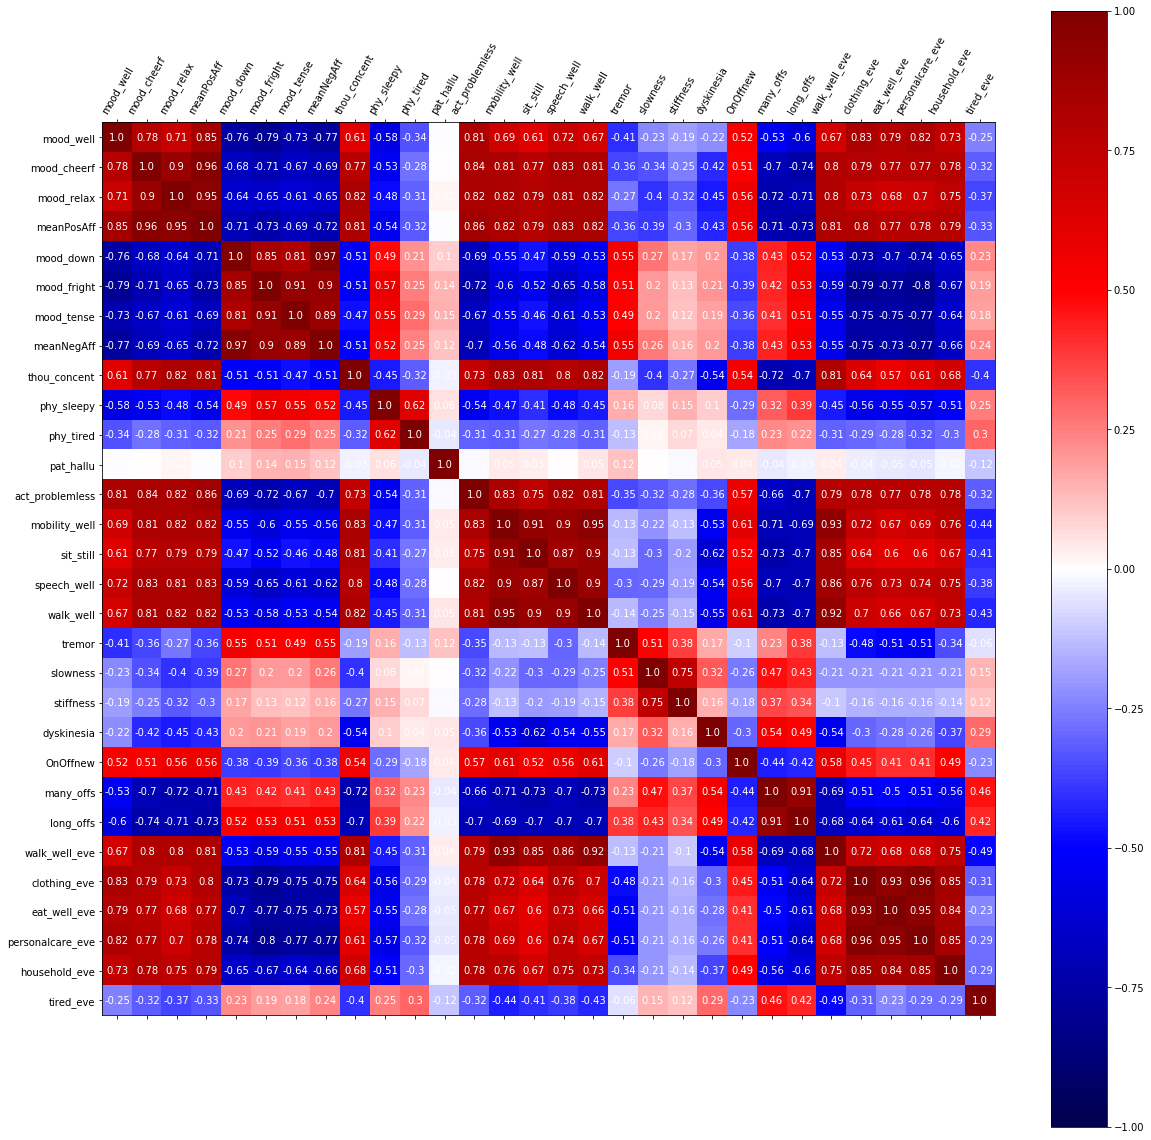

In [173]:
# create heatmap or confusion matrix for correlation between all esm-items
# for subjects WITH subgroup (Fluc's)

subPop = 'flucPresence'

# create list with relevant ESM items
corrItemList = ['mood_well','mood_cheerf', 'mood_relax','meanPosAff', 'mood_down', 'mood_fright', 'mood_tense','meanNegAff',
         'thou_concent', 'phy_sleepy', 'phy_tired','pat_hallu',
 'act_problemless', 'mobility_well', 'sit_still', 'speech_well', 'walk_well', 
    'tremor', 'slowness', 'stiffness', 'dyskinesia',  
     'OnOffnew', 'many_offs', 'long_offs', 'walk_well_eve',
       'clothing_eve', 'eat_well_eve', 'personalcare_eve', 'household_eve',
       'tired_eve']

# create empty dataframe with correct shape
heatmap = np.zeros((len(corrItemList),len(corrItemList)))

for x in range(len(corrItemList)):
    for y in range(len(corrItemList)):
        heatmap[x,y] = spearmanr(esmFused[esmFused[subPop]==1][corrItemList[x]],esmFused[esmFused[subPop]==1][corrItemList[y]])[0]

plt.figure(figsize=(20,20)) # use to enlarge size of figure 
plt.matshow(heatmap, fignum=1, cmap='seismic', vmin=-1,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
plt.colorbar()
plt.xticks(np.arange(len(corrItemList)), corrItemList, rotation= 60)
plt.yticks(np.arange(len(corrItemList)), corrItemList, rotation= 0)

# Loop over data dimensions and create text annotations.
for i in range(len(corrItemList)):
    for j in range(len(corrItemList)):
        text = plt.text(j, i, round(heatmap[i, j],2),
                       ha="center", va="center", color="w")

plt.show()

In [8]:
## CALCULATE MEANS and STD's

subgroups = [esmFused[esmFused['flucPresence']==0], esmFused[esmFused['flucPresence']==1]]

items = [ 'meanPosAff', 'meanNegAff', 'phy_sleepy', 'phy_tired',
 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_beweeg',  
     'OnOffnew', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid']

meanStd = np.zeros((len(items),len(subgroups)*2))

for item in range(len(items)):
    for sub in range(len(subgroups)):
        meanStd[item,2*sub] = np.mean(subgroups[sub][items[item]]) # mean sub 1, item 1
        meanStd[item,2*sub+1] = np.std(subgroups[sub][items[item]]) # mean sub 1, item 1

meanTable = pd.DataFrame(meanStd, index=items, columns=['meanNoFluc', 'stdNoFluc', 'meanFluc','stdFluc'])
meanTable

,meanNoFluc,stdNoFluc,meanFluc,stdFluc
meanPosAff,5.960784,0.913325,5.564417,1.440637
meanNegAff,1.440162,0.690148,1.535787,0.770038
phy_sleepy,2.174442,1.381564,2.288344,1.256756
phy_tired,2.454361,1.448384,2.650307,1.182872
act_norpob,6.290061,0.853963,5.503067,1.640643
sanpar_been,5.673428,1.031376,5.122699,1.647728
sanpar_stil,5.638945,1.006805,5.300613,1.392949
sanpar_spreken,6.099391,0.805823,5.941718,0.875524
sanpar_lopen,5.563895,1.053572,4.972393,1.705955
sanpar_tremor,1.758621,1.311732,2.144172,1.347827


In [9]:
## CALCULATE MEANS and STD's

subgroups = [esmFused[esmFused['flucPresence']==0], esmFused[esmFused['flucPresence']==1]]

items = [ 'meanPosAff', 'meanNegAff', 'phy_sleepy', 'phy_tired',
 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_beweeg',  
     'OnOffnew', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid']


# per individual of second in subgroups (with fluc's)
meanStd = np.zeros((len(items),2*len(subgroups[1].castorID.unique())))
for nr, id in enumerate(subgroups[1].castorID.unique()):
    for item in range(len(items)):
        meanStd[item,0+2*nr] = np.mean(esmFused[esmFused['castorID']== id ][items[item]]) # mean sub 1, item 1
        meanStd[item,1+2*nr] = np.std(esmFused[esmFused['castorID']== id ][items[item]]) # mean sub 1, item 1
#         meanTable = pd.DataFrame(meanStd, index=items, columns=['mean'+str(id), 'std'+str(id)])
#     print(meanTable)

In [ ]:
## calculate ICC: correlation of items within persons or correlation between persons within subgroups

# ICC = tau^2 / (tau^2 + sigma^2)

#  ESM stat's notes

#           (Intercept) Residual
# StdDev:   0.8887876 0.966843

# Fixed effects: posaff ~ eve_pleasant 
#                 Value  Std.Error    DF  t-value p-value
# (Intercept)  4.267726 0.04966484 10558 85.93054       0
# eve_pleasant 0.195130 0.00603125 10558 32.35309       0

# # intercept value = predicted average posaff bij x=0 = eve_pleasant=0
# # eve_pleasant value = slope voor verandering average_posaff voor verandering average_eve_pleasant
# # DUS: predicted average-posaff bij eve_pleasant = -3 --> 4.27 + (-3*0.19)
# # DUS ! StdDev-Intercept = TAU (between person) -> 95% CI for all intercepts
# # DUS ! StdDev-Residual = SIGMA (within person -> 95% CI of intercept of one individual case)

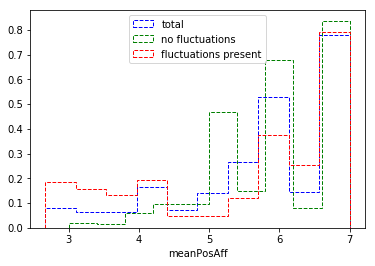

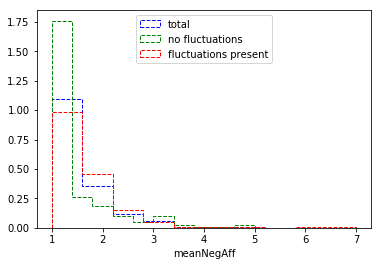

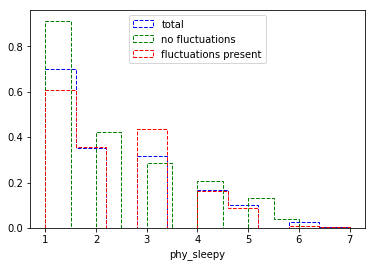

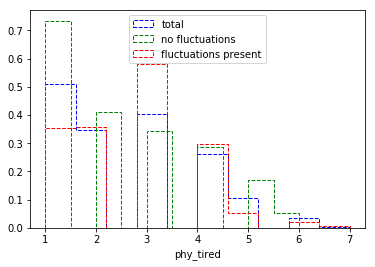

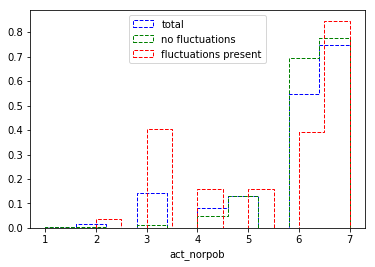

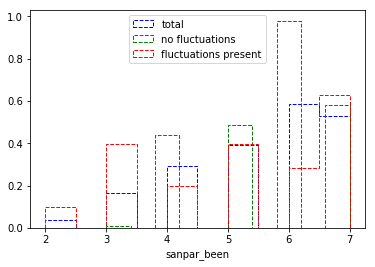

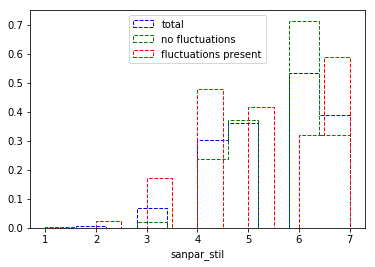

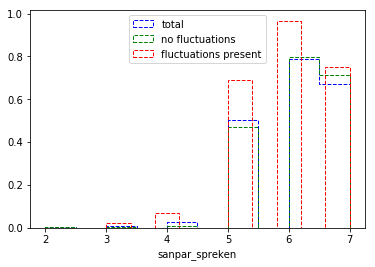

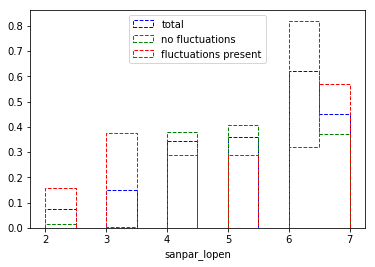

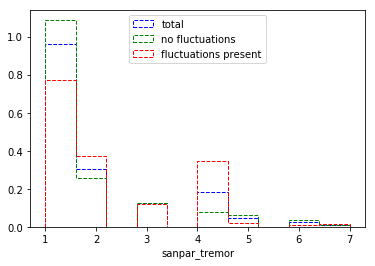

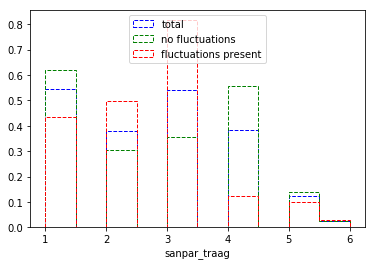

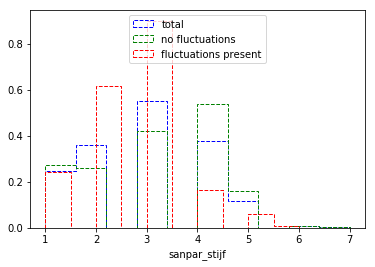

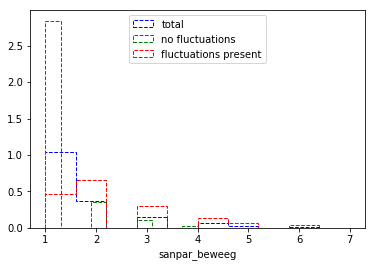

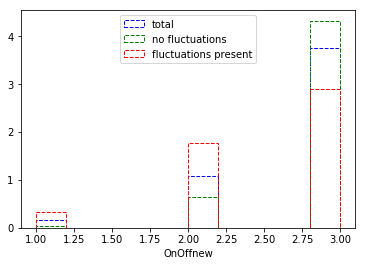

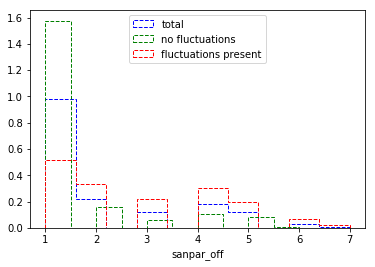

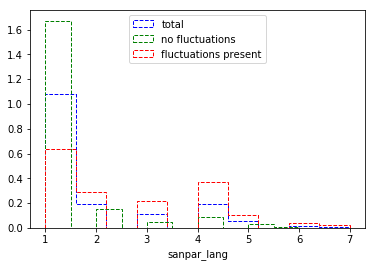

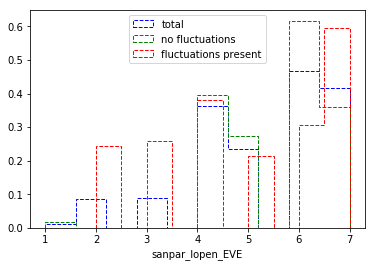

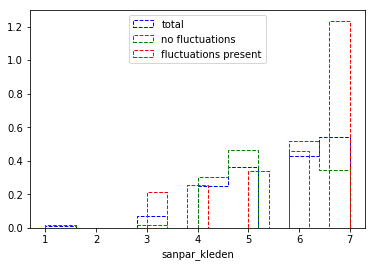

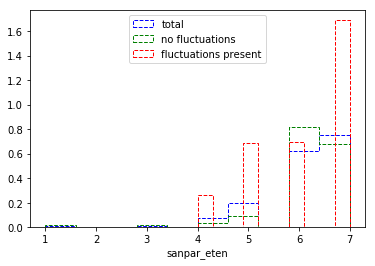

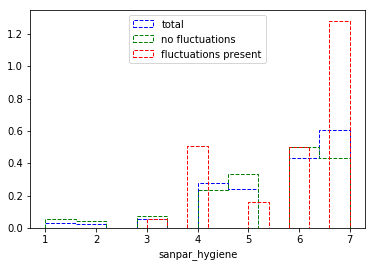

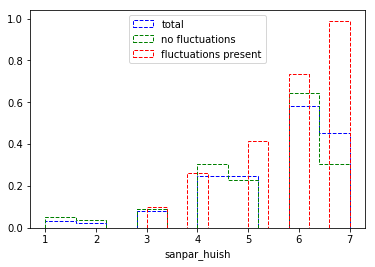

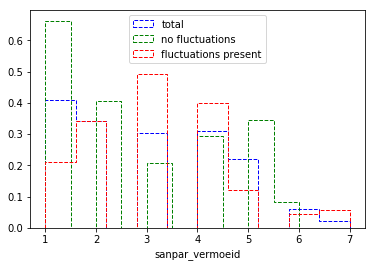

In [50]:
##visualise distribution of answers per item (including subgroups)

itemList = ['meanPosAff', 'meanNegAff', 'phy_sleepy', 'phy_tired',
 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_beweeg',  
     'OnOffnew', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid']

for i in itemList:
    plt.hist(esmFused[i].dropna(), color='blue', linestyle='dashed', histtype='step', normed=True)
    plt.hist(esmFused[i][esmFused['flucPresence'] == 0].dropna(), linestyle='dashed',color='green', histtype='step', normed=True)
    plt.hist(esmFused[i][esmFused['flucPresence'] == 1].dropna(), linestyle='dashed',color='red', histtype='step', normed=True)
    plt.legend(['total',"no fluctuations","fluctuations present"],loc="upper center")
    plt.xlabel(i)
    plt.figure()
    plt.show()


In [12]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [254]:
## CALCULATE MEANS and STD's

subgroups = [esmFused[esmFused['flucPresence']==0], esmFused[esmFused['flucPresence']==1]]



meanStd = np.zeros((len(items),len(subgroups)*2))

for item in range(len(items)):
    for sub in range(len(subgroups)):
        meanStd[item,2*sub] = np.mean(subgroups[sub][items[item]]) # mean sub 1, item 1
        meanStd[item,2*sub+1] = np.std(subgroups[sub][items[item]]) # mean sub 1, item 1

meanTable = pd.DataFrame(meanStd, index=items, columns=['meanNoFluc', 'stdNoFluc', 'meanFluc','stdFluc'])
meanTable

,meanNoFluc,stdNoFluc,meanFluc,stdFluc
meanPosAff,5.960784,0.913325,5.564417,1.440637
meanNegAff,1.440162,0.690148,1.535787,0.770038
phy_sleepy,2.174442,1.381564,2.288344,1.256756
phy_tired,2.454361,1.448384,2.650307,1.182872
act_norpob,6.290061,0.853963,5.503067,1.640643
sanpar_been,5.673428,1.031376,5.122699,1.647728
sanpar_stil,5.638945,1.006805,5.300613,1.392949
sanpar_spreken,6.099391,0.805823,5.941718,0.875524
sanpar_lopen,5.563895,1.053572,4.972393,1.705955
sanpar_tremor,1.758621,1.311732,2.144172,1.347827


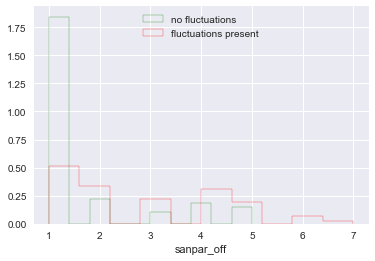

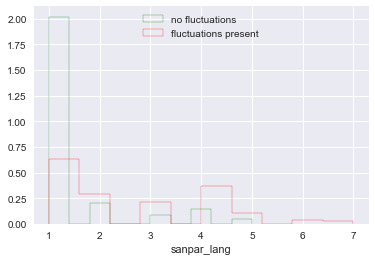

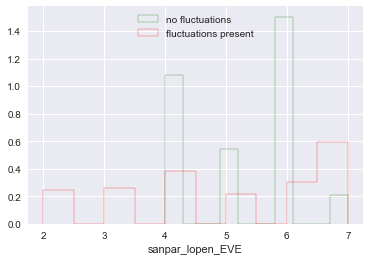

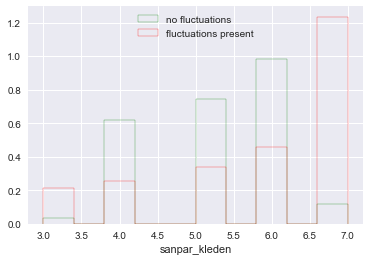

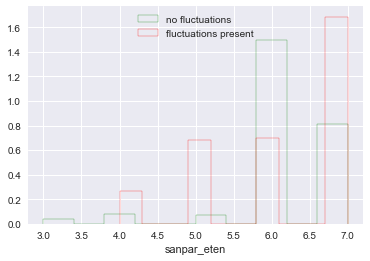

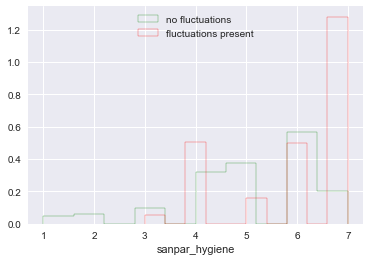

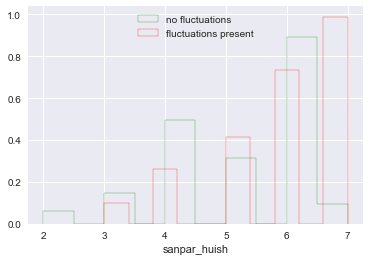

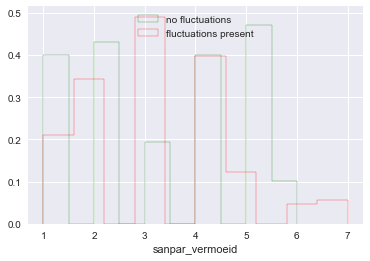

In [245]:
## HISTOGRAMS FOR EVENING ITEMS

itemList = ['sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid']

for i in itemList:
    plt.hist(esmFused[i][esmFused['flucPresence'] == 0].dropna(), color='green', histtype='step', normed=True)
    plt.hist(esmFused[i][esmFused['flucPresence'] == 1].dropna(), color='red', histtype='step', normed=True) 
    plt.legend(["no fluctuations","fluctuations present"],loc="upper center")
    plt.xlabel(i)
    plt.figure()
    plt.show()

GENERAL IDEA ANALYSES FOR LIST PERFORMANCE

1. formulate research question and hypothesis -> Is ESM a valid method to detect daily life motor fluctuations in PD patients?
    a. demography -> explanation subgroups: phenotypes, PD patients w/ fluctuations vs. PD w/o fluctuations (quasi control group) (incl. std statistics mean/SD/variance of motor symptoms over subgroups)
    b. primary outcome -> presence motorfluctuations + variability of motor symptoms over subgroups; including correlations with motor context (ON/Off/ act_problem)
    c. secondary outcomes -> control/correct for non-motor symptoms (affect?); only show associations, dont make hard statements.


Think about methods/analyses to objectivy variability per item (consider subpopulation-analyses for relevant questions) (check ESM/EMA literature for inspiration)

test presence/variability of tremor in subRigid and presence/variability of bradykinesia in subTremor. explain findings, are these findings coming back in rest of answers? Does it differs between subgroups with/without fluctuations?

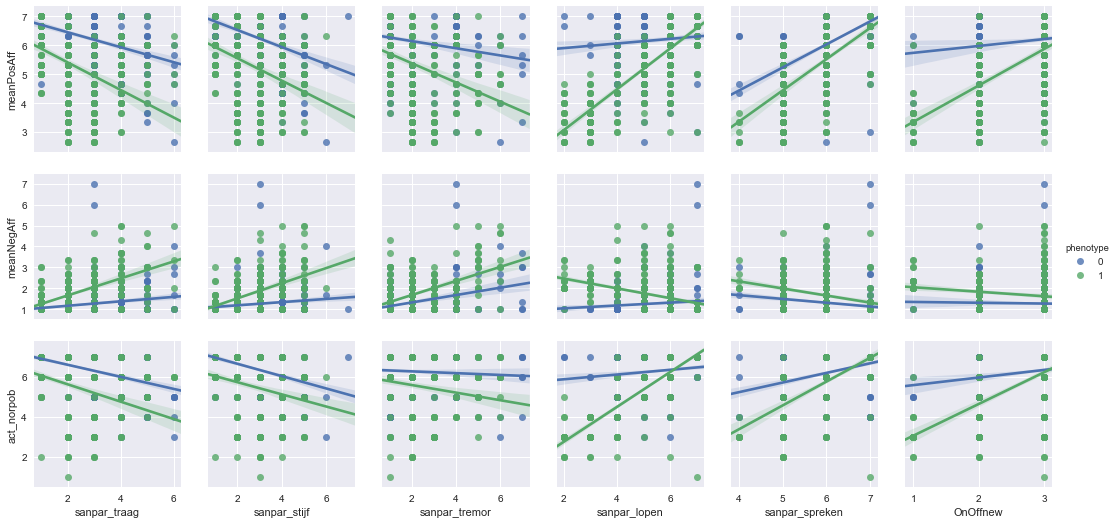

In [26]:
## visualize correlations seaborn pairplots
sns.set(color_codes=True)
g = sns.pairplot(esmValid, y_vars=["meanPosAff", "meanNegAff", "act_norpob"], x_vars=["sanpar_traag", "sanpar_stijf", "sanpar_tremor", "sanpar_lopen", "sanpar_spreken","OnOffnew"] ,kind="reg", hue="phenotype") # hue = "castorID", 

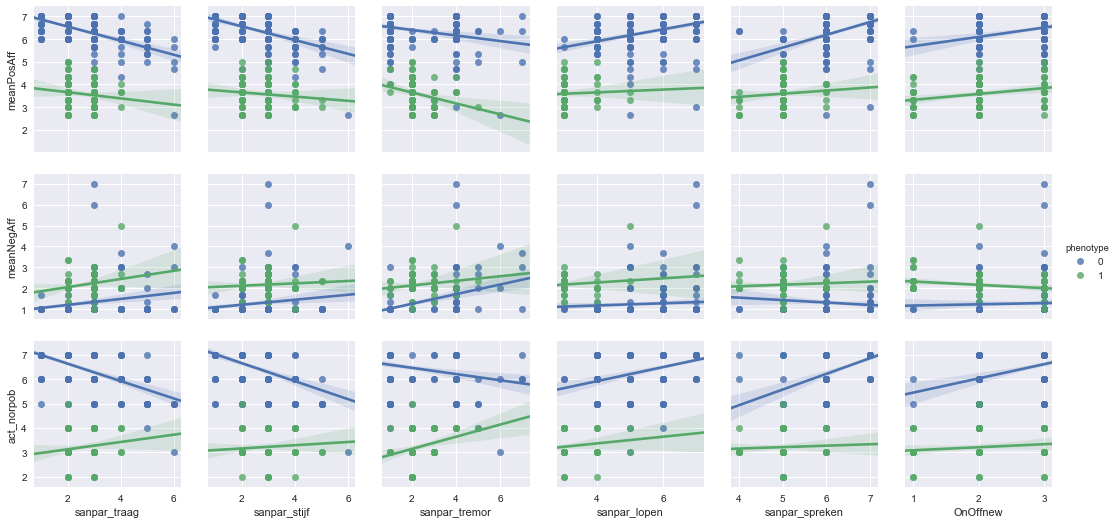

In [182]:
## visualize correlations seaborn pairplots
sns.set(color_codes=True)
g = sns.pairplot(subFluct, y_vars=["meanPosAff", "meanNegAff", "act_norpob"], x_vars=["sanpar_traag", "sanpar_stijf", "sanpar_tremor", "sanpar_lopen", "sanpar_spreken","OnOffnew"] ,kind="reg", hue="phenotype") # hue = "castorID", 

PM: relevance of act_norpob vs. bradykinesia or tremor: detect activity-performance drops (f.e. 1-2 points) and relate this to increase in reported traagheid/stijfheid/tremor. relate this further to sensor data and try to find biomarker threshold for desired intervention.

Add ESM-item on desired DBS change in pilot 2. Then correlate DBS-change desire to ESM-motor items and to sensor features.
In pilot 2: Add different/more precise performance questions besides act_norpob?

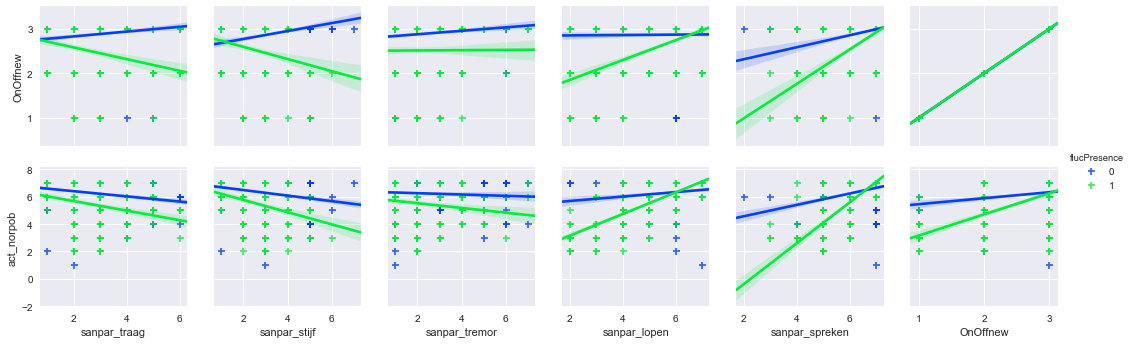

In [27]:
sns.set(color_codes=True, palette="bright")
g = sns.pairplot(esmValid, markers="+", x_vars=["sanpar_traag", "sanpar_stijf", "sanpar_tremor", "sanpar_lopen", "sanpar_spreken", "OnOffnew"], y_vars=["OnOffnew", "act_norpob"], kind="reg", hue="flucPresence")

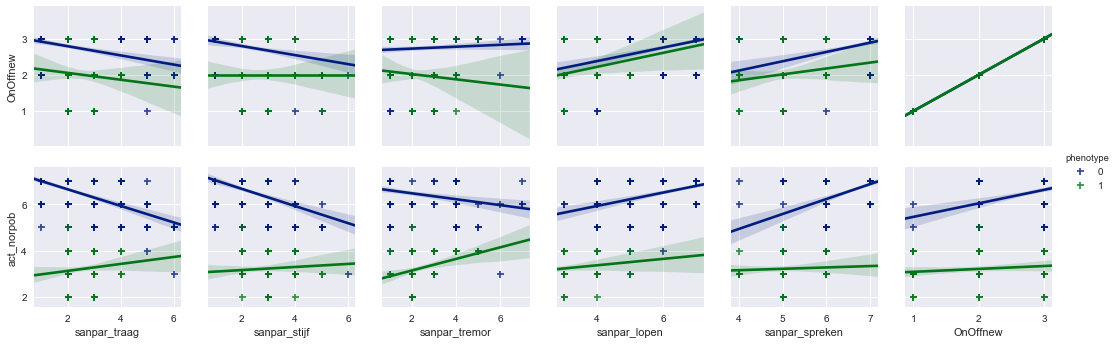

In [183]:
# further analyses association motor symptoms scores and OnOff+performance scores  
# only in group suffering from fluctuations, divided per phenotype
# PM subFluct is n = 4 (nTremor = 1, nRigid = 3)
sns.set(color_codes=True, palette="dark")
g = sns.pairplot(subFluct, markers="+", x_vars=["sanpar_traag", "sanpar_stijf", "sanpar_tremor", "sanpar_lopen", "sanpar_spreken", "OnOffnew"], y_vars=["OnOffnew", "act_norpob"], kind="reg", hue="phenotype")

test multilevel regression analyses for influence 1 delta point affect (e.g.) on motor symptoms (check example analyses in ESM course in R code).

(array([  3.,   0.,   0.,   0.,   0.,  63.,   0.,   0.,   0., 446.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

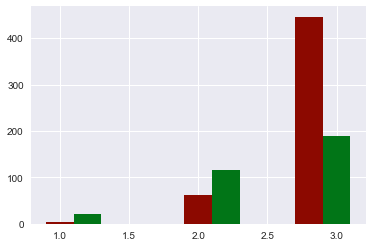

In [30]:
plt.hist(esmValid['OnOffnew'][esmValid["flucPresence"] == 1].dropna(), color="g", align='right')
plt.hist(esmValid['OnOffnew'][esmValid["flucPresence"] == 0].dropna(), color="r", align='left')

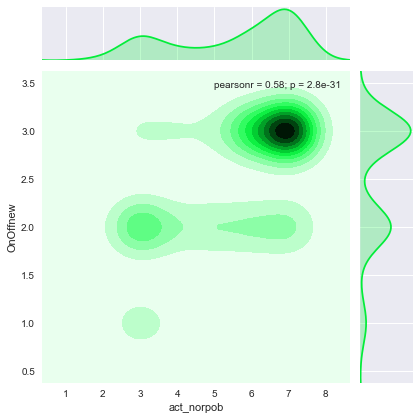

In [25]:
g = sns.jointplot("act_norpob", "OnOffnew", data=esmValid[esmValid["flucPresence"] == 1], kind="kde", color="g") 



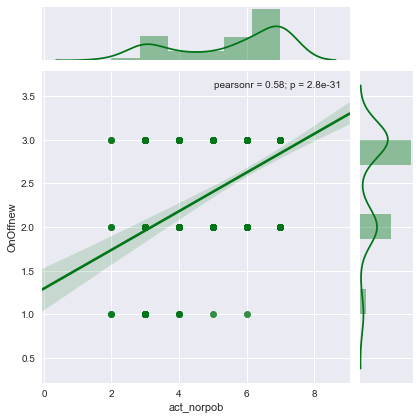

In [31]:
g = sns.jointplot("act_norpob", "OnOffnew", data=esmValid[esmValid["flucPresence"] == 1], kind="regid", color="g") 


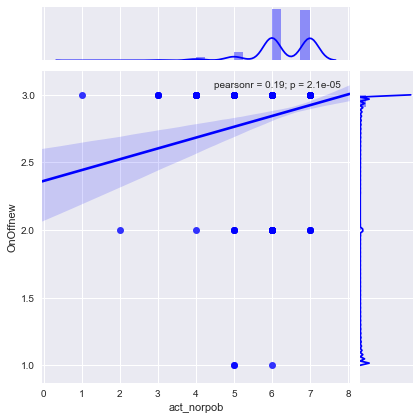

In [32]:
g = sns.jointplot("act_norpob", "OnOffnew", data=esmValid[esmValid["flucPresence"] == 0], kind="regid", color="blue") 



PM !!!!!! check for fluctuations in flucPres YES or NO; are answer during inclusion correlating with observed fluctuatinos in ESM answers?!

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<Container object of 11 artists>

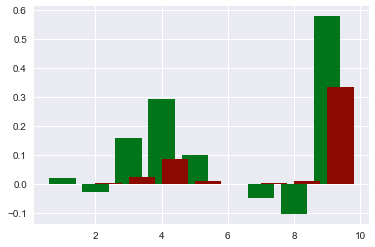

In [38]:
## creating barplot of explained values per person

listIDs = esmValid['castorID'].unique().tolist()
listCorrs = np.zeros(len(listIDs))
listCorrSq = np.zeros(len(listIDs))
feat1 = 'act_norpob'
feat2 = 'OnOffnew'


for ID in range(len(listIDs)):
    listCorrs[ID]= spearmanr(esmValid[esmValid['castorID']==listIDs[ID]][feat1],esmValid[esmValid['castorID']==listIDs[ID]][feat2])[0]
    listCorrSq[ID]= listCorrs[ID]*listCorrs[ID]


plt.bar(np.arange(len(listCorrs))+1,listCorrs, align='center', color='g')
plt.bar(np.arange(len(listCorrs))+1,listCorrSq, align='edge', color='r')



<Container object of 4 artists>

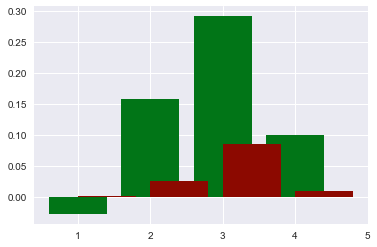

In [41]:
## creating barplot of explained values per person; FOR ONLY SUBJECTS WITH FLUCT'S

listIDs = subFluct['castorID'].unique().tolist()
listCorrs = np.zeros(len(listIDs))
listCorrSq = np.zeros(len(listIDs))
feat1 = 'act_norpob'
feat2 = 'OnOffnew'


for ID in range(len(listIDs)):
    listCorrs[ID]= spearmanr(subFluct[subFluct['castorID']==listIDs[ID]][feat1],subFluct[subFluct['castorID']==listIDs[ID]][feat2])[0]
    listCorrSq[ID]= listCorrs[ID]*listCorrs[ID]


plt.bar(np.arange(len(listCorrs))+1,listCorrs, align='center', color='g')
plt.bar(np.arange(len(listCorrs))+1,listCorrSq, align='edge', color='r')

In [44]:
esmNanClear = esmValid.dropna(axis=0)

In [55]:
esmValid.isnull().any()


subjno            False
mood_well         False
mood_down         False
mood_fright       False
mood_tense        False
phy_sleepy        False
phy_tired         False
mood_cheerf        True
mood_relax         True
thou_concent       True
pat_hallu          True
loc_where          True
soc_who            True
soc_who02          True
soc_who03          True
act_what           True
act_what02         True
act_what03         True
act_norpob         True
sanpar_been        True
sanpar_stil        True
sanpar_spreken     True
sanpar_lopen       True
sanpar_tremor      True
sanpar_traag       True
sanpar_stijf       True
sanpar_spann       True
sanpar_beweeg      True
sanpar_onoff       True
sanpar_medic       True
beep_disturb       True
_datetime         False
_datetime_e       False
dayno_n           False
beepno_n          False
duration          False
castorID          False
validDay          False
meanPosAff         True
meanNegAff        False
OnOffnew           True
newBrady        

In [124]:
esmFused.keys()

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_problemless',
       'mobility_well', 'sit_still', 'speech_well', 'walk_well', 'tremor',
       'slowness', 'stiffness', 'muscle_tension', 'dyskinesia', 'sanpar_onoff',
       'sanpar_medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n',
       'beepno_n', 'duration', 'castorID', 'dateOnly', 'validDay',
       'meanPosAff', 'meanNegAff', 'OnOffnew', 'newBrady', 'flucPresence',
       'phenotype', 'DBS', 'subjno_MOR', 'mor_sleptwell', 'often_awake',
       'mor_rested', 'tired_phys', 'tired_ment', '_datetime_MOR',
       '_datetime_e_MOR', 'duration_MOR', 'validDay_MOR', 'subjno_EVE',
       'many_offs', 'long_offs', 'walk_well_eve', 'clothing_eve',
       'eat_well_eve', 'personalcare_eve', 'household_eve', '

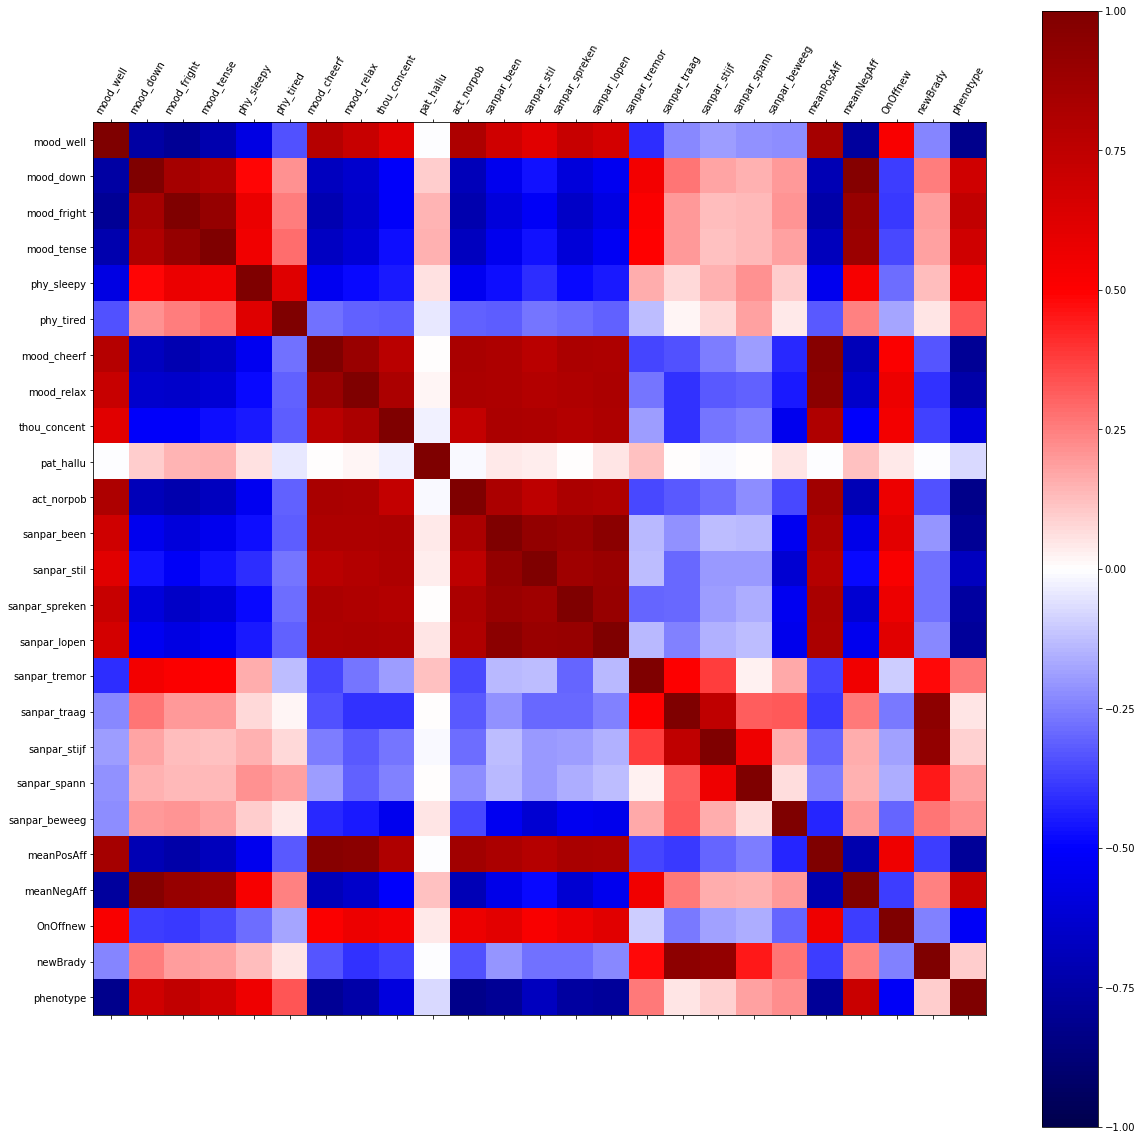

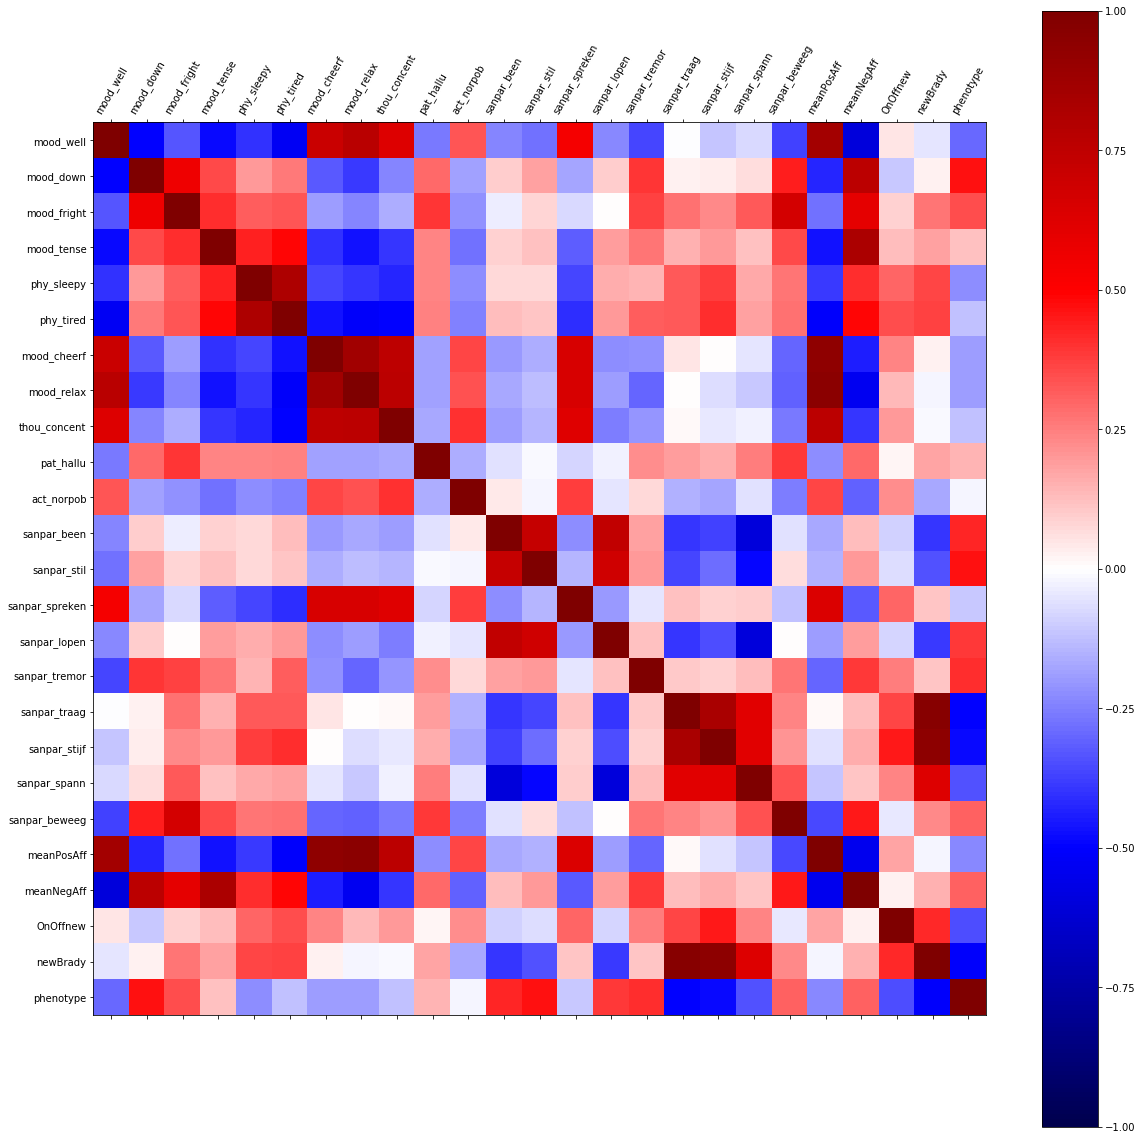

In [181]:
# create heatmap or confusion matrix for correlation between all esm-items
# for subjects WITHOUT FLUCTUATIONS

# create list with relevant ESM items
corrItemList = ['mood_well', 'mood_down', 'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax',
 'thou_concent', 'pat_hallu', 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg',  
     'meanPosAff', 'meanNegAff', 'OnOffnew', 'newBrady',   'phenotype']

# create empty dataframe with correct shape
heatmap = np.zeros((len(corrItemList),len(corrItemList)))

for x in range(len(corrItemList)):
    for y in range(len(corrItemList)):
        heatmap[x,y] = spearmanr(esmValid[esmValid['flucPresence']==0][corrItemList[x]],esmValid[esmValid['flucPresence']==0][corrItemList[y]])[0]

plt.figure(figsize=(20,20)) # use to enlarge size of figure 
plt.matshow(heatmap, fignum=1, cmap='seismic', vmin=-1,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
plt.colorbar()
plt.xticks(np.arange(len(corrItemList)), corrItemList, rotation= 60)
plt.yticks(np.arange(len(corrItemList)), corrItemList, rotation= 0)
plt.show()

In [202]:
esmFused.keys()

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_norpob', 'sanpar_been',
       'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 'sanpar_tremor',
       'sanpar_traag', 'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg',
       'sanpar_onoff', 'sanpar_medic', 'beep_disturb', '_datetime',
       '_datetime_e', 'dayno_n', 'beepno_n', 'duration', 'castorID',
       'dateOnly', 'validDay', 'meanPosAff', 'meanNegAff', 'OnOffnew',
       'newBrady', 'flucPresence', 'phenotype', 'subjno_MOR', 'mor_sleptwell',
       'sanpar_awake', 'mor_rested', 'sanpar_lich', 'sanpar_tired',
       '_datetime_MOR', '_datetime_e_MOR', 'duration_MOR', 'validDay_MOR',
       'subjno_EVE', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', '

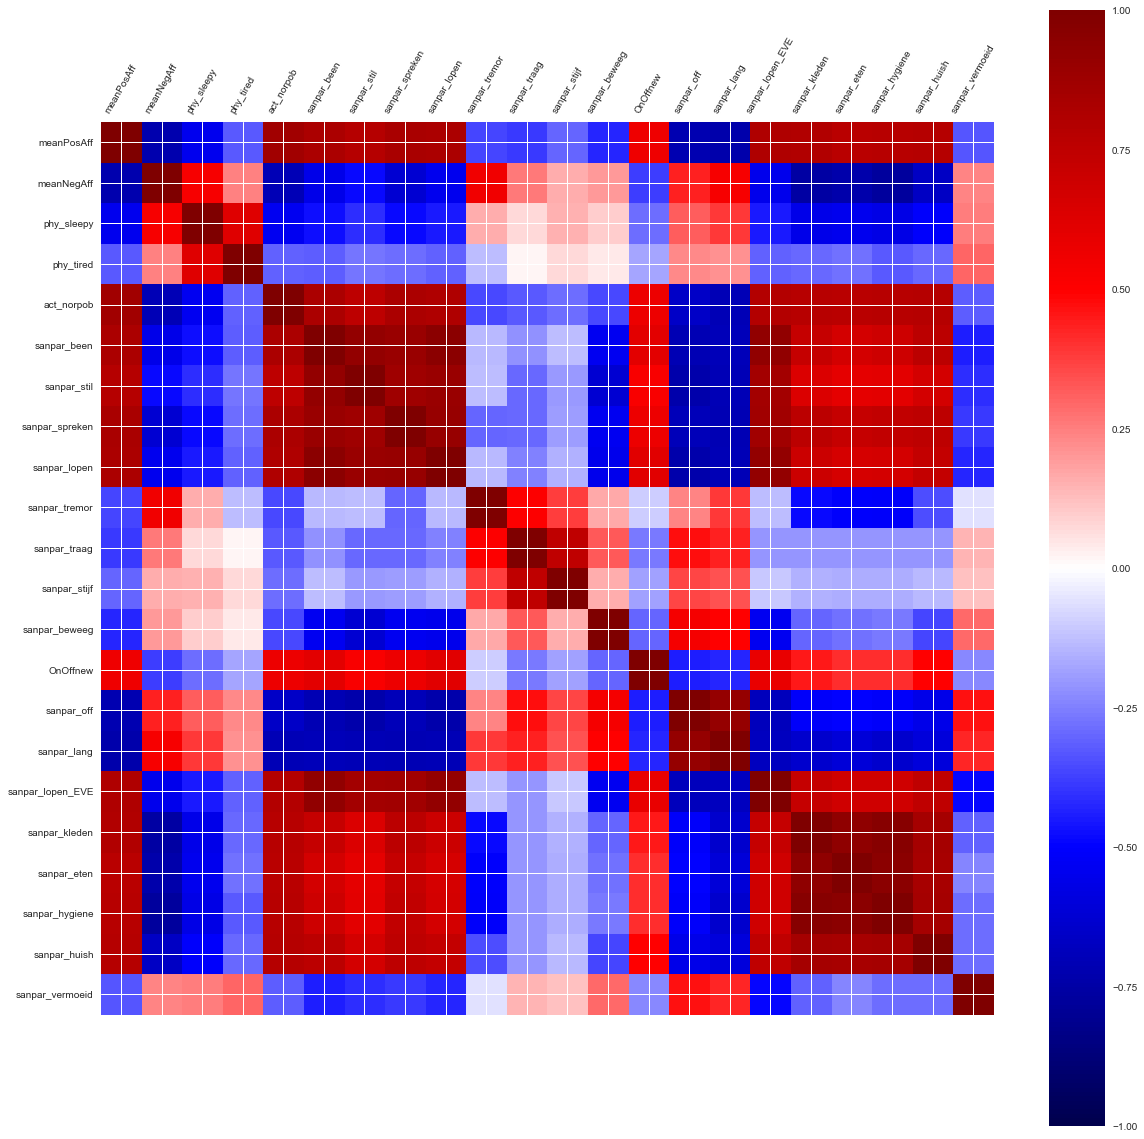

In [203]:
## analyses beeps vs MOR-EVE

# create heatmap or confusion matrix for correlation between all esm-items
# for subjects WITH FLUCTUATIONS

# create list with relevant ESM items
corrItemList = [ 'meanPosAff', 'meanNegAff', 'phy_sleepy', 'phy_tired',
 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_beweeg',  
     'OnOffnew', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid']

# create empty dataframe with correct shape
heatmap = np.zeros((len(corrItemList),len(corrItemList)))

for x in range(len(corrItemList)):
    for y in range(len(corrItemList)):
        heatmap[x,y] = spearmanr(esmFused[esmFused['flucPresence']==1][corrItemList[x]],esmFused[esmFused['flucPresence']==1][corrItemList[y]])[0]

plt.figure(figsize=(20,20)) # use to enlarge size of figure 
plt.matshow(heatmap, fignum=1, cmap='seismic', vmin=-1,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
plt.colorbar()
plt.xticks(np.arange(len(corrItemList)), corrItemList, rotation= 60)
plt.yticks(np.arange(len(corrItemList)), corrItemList, rotation= 0)
plt.show()

In [242]:
## analyses beeps vs MOR-EVE

# create heatmap or confusion matrix for correlation between all esm-items
# for subjects WITHOUT FLUCTUATIONS

corrData = esmFused[esmFused['flucPresence']==0].filter(['meanPosAff', 'meanNegAff', 'phy_sleepy', 'phy_tired',
 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_beweeg',  
     'OnOffnew', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid'], axis=1)


# visualize which rows have missings in relevant filtered items
for row in range(len(corrData)):
    if corrData.iloc[row].isnull().any() == True:
        corrData = corrData.iloc[row]) # REMOVE ROW WITH MISSINGS

# create list with relevant ESM items
corrItemList = [ 'meanPosAff', 'meanNegAff', 'phy_sleepy', 'phy_tired',
 'act_norpob', 'sanpar_been', 'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 
    'sanpar_tremor', 'sanpar_traag', 'sanpar_stijf', 'sanpar_beweeg',  
     'OnOffnew', 'sanpar_off', 'sanpar_lang', 'sanpar_lopen_EVE',
       'sanpar_kleden', 'sanpar_eten', 'sanpar_hygiene', 'sanpar_huish',
       'sanpar_vermoeid']

# create empty dataframe with correct shape
heatmap = np.zeros((len(corrItemList),len(corrItemList)))

for x in range(len(corrItemList)):
    for y in range(len(corrItemList)):
        heatmap[x,y] = spearmanr(corrData[corrItemList[x]],corrData[corrItemList[y]])[0]
                                 

plt.figure(figsize=(20,20)) # use to enlarge size of figure 
plt.matshow(heatmap, fignum=1, cmap='seismic', vmin=-1,vmax=1)      # fignum = 1  is to use the enlarged figure frame   
plt.colorbar()
plt.xticks(np.arange(len(corrItemList)), corrItemList, rotation= 60)
plt.yticks(np.arange(len(corrItemList)), corrItemList, rotation= 0)
plt.show()

AttributeError: __delitem__

In [124]:
print('Spearman correlations goed stil zitten/staan vs zeker ter been')
for id in range(esmValid['castorID'].nunique()):
   
    # Add Spearman Correlation test
    r, p = spearmanr(esmValid[esmValid['castorID']==(110001+id)]['newBrady'],esmValid[esmValid['castorID']==(110001+id)]['OnOffnew'])
    print('For',110001+id,'Spearman correlation of r = %.2f with a p-value of %.2f' % (r, p))

Spearman correlations goed stil zitten/staan vs zeker ter been
For 110001 Spearman correlation of r = -0.10 with a p-value of 0.42
For 110002 Spearman correlation of r = -0.03 with a p-value of 0.74
For 110003 Spearman correlation of r = -0.28 with a p-value of 0.02
For 110004 Spearman correlation of r = -0.28 with a p-value of 0.01
For 110005 Spearman correlation of r = nan with a p-value of nan
For 110006 Spearman correlation of r = -0.14 with a p-value of 0.21
For 110007 Spearman correlation of r = -0.00 with a p-value of 0.98
For 110008 Spearman correlation of r = 0.12 with a p-value of 0.36
For 110009 Spearman correlation of r = -0.11 with a p-value of 0.30


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Spearman correlations meanPosAff vs meanNegAff
For 110001 Spearman correlation of r = 0.02 with a p-value of 0.87
For 110002 Spearman correlation of r = -0.18 with a p-value of 0.08
For 110003 Spearman correlation of r = -0.28 with a p-value of 0.02
For 110004 Spearman correlation of r = -0.23 with a p-value of 0.05
For 110005 Spearman correlation of r = -0.57 with a p-value of 0.00
For 110006 Spearman correlation of r = -0.49 with a p-value of 0.00
For 110007 Spearman correlation of r = -0.69 with a p-value of 0.00
For 110008 Spearman correlation of r = 0.01 with a p-value of 0.97
For 110009 Spearman correlation of r = -0.26 with a p-value of 0.01


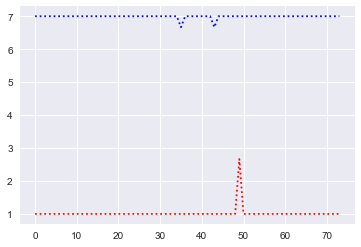

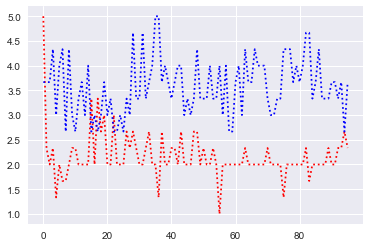

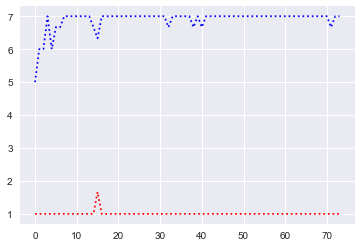

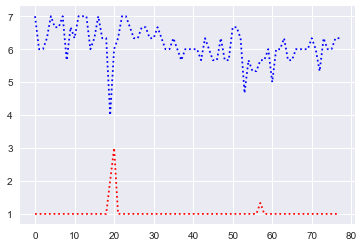

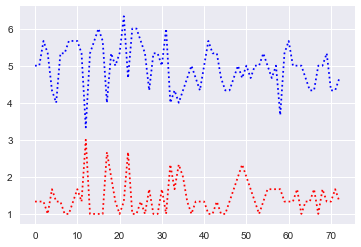

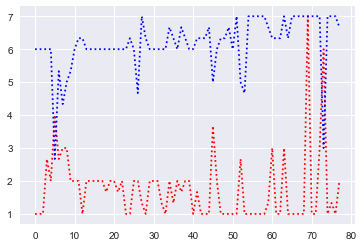

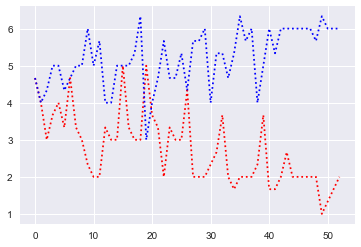

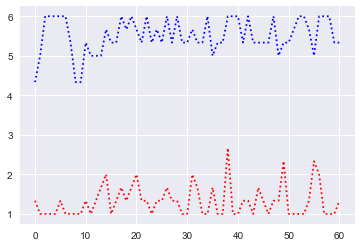

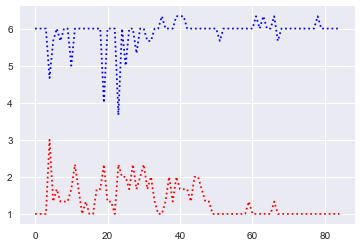

In [28]:
# mean NegAff vs meanPosAff
print('Spearman correlations meanPosAff vs meanNegAff')
for id in range(esmValid['castorID'].nunique()):
    fig = plt.figure()
    ax = plt.axes()

    x = range(len(esmValid[esmValid['castorID']==(110001+id)]['meanNegAff']))
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['meanNegAff'], color='red', linestyle='dotted')
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['meanPosAff'], color='blue', linestyle='dotted');
    

    # Add Spearman Correlation test
    r, p = spearmanr(esmValid[esmValid['castorID']==(110001+id)]['meanPosAff'],esmValid[esmValid['castorID']==(110001+id)]['meanNegAff'])
    print('For',110001+id,'Spearman correlation of r = %.2f with a p-value of %.2f' % (r, p))

For 110001 Spearman correlation of r = 0.019507 with a p-value of 0.868973
For 110002 Spearman correlation of r = -0.180039 with a p-value of 0.079211
For 110003 Spearman correlation of r = -0.277773 with a p-value of 0.016567
For 110004 Spearman correlation of r = -0.227500 with a p-value of 0.045163
For 110005 Spearman correlation of r = -0.569470 with a p-value of 0.000000
For 110006 Spearman correlation of r = -0.492679 with a p-value of 0.000005

Correlations between meanPosAff and meanNegAff:
pt1: no correlation at all, too less variability in answers
pt2,3,4: slight negative correlation (-0.18 - -0.28), with (borderline) stat significance
pt5,6: circa 50% negative correlation with large significance.

concluding: posAff and negAff seem to be valid items based on variability and internal correlation.

In [10]:
esmValid.keys()

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_norpob', 'sanpar_been',
       'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 'sanpar_tremor',
       'sanpar_traag', 'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg',
       'sanpar_onoff', 'sanpar_medic', 'beep_disturb', '_datetime',
       '_datetime_e', 'dayno_n', 'beepno_n', 'duration', 'castorID',
       'validDay', 'meanPosAff', 'meanNegAff', 'OnOffnew', 'newBrady',
       'flucPresence', 'phenotype'],
      dtype='object')

In [9]:
esmValid.castorID.unique()

array([110001, 110002, 110003, 110004, 110005, 110006, 110007, 110008,
       110009])

In [ ]:
### internal validities with Cronbach's alpha

In [33]:
## make centered values per person for cronbachs alpha analyses

esmValid["centerWell"] = 0

for row in range(len(esmValid["centerWell"])):
    esmValid["centerWell"].iloc[row] = esmValid["mood_well"].iloc[row]-np.mean(esmValid[esmValid["castorID"] == (esmValid["castorID"].iloc[row])]["mood_well"])

esmValid["centerRelax"] = 0
for row in range(len(esmValid["centerRelax"])):
    esmValid["centerRelax"].iloc[row] = esmValid["mood_relax"].iloc[row]-np.mean(esmValid[esmValid["castorID"] == (esmValid["castorID"].iloc[row])]["mood_relax"])

esmValid["centerCheerf"] = 0
for row in range(len(esmValid["centerCheerf"])):
    esmValid["centerCheerf"].iloc[row] = esmValid["mood_cheerf"].iloc[row]-np.mean(esmValid[esmValid["castorID"] == (esmValid["castorID"].iloc[row])]["mood_cheerf"])


# how to calculate Cronbachs alpha in python??

# since there is no selection of items possible now/ not intended; is factor analysis needed?
# or only focus on construct validity by analyzing corr coeff's between pos/neg related and 
# non-related items, plus per patient analyses? -> concurrent and discriminant validity?
# report r + p values of relevant associations (concurrent/discriminant)
# for construct validity: perform unconditional slope analyses with multi level correction for 
# person (and whatdo-withwhoem?)

# convergent/divergent validity not possible since we have no goldenstd to compare?
# -> try convergent validity by correlation between EVE and average day BEEP

# interindividual variation
# 1. visual inspection, maybe provide figures as supplemental data
# 2. multilevel analyses for variance (between and intra individual)
# fixed factor mean = grand mean per item; then report variance due to person, and day/beep?
# different variability within persons, intra days??!!



# compare grand means and variance of items explained by subgroups, and compare with
# theoretical arguments. variance tremor in subTremor; variance ON/OFF in subFluct
# collect recent UPDRS scores to compare correlations? convergent validity

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after re

how to calculate Cronbachs alpha in python??

since there is no selection of items possible now/ not intended; is factor analysis needed?
or only focus on construct validity by analyzing corr coeff's between pos/neg related and 
non-related items, plus per patient analyses? -> concurrent and discriminant validity?
report r + p values of relevant associations (concurrent/discriminant)
for construct validity: perform unconditional slope analyses with multi level correction for 
person (and whatdo-withwhoem?)

convergent/divergent validity not possible since we have no goldenstd to compare?
-> try convergent validity by correlation between EVE and average day BEEP

interindividual variation
1. visual inspection, maybe provide figures as supplemental data
2. multilevel analyses for variance (between and intra individual)
fixed factor mean = grand mean per item; then report variance due to person, and day/beep?
different variability within persons, intra days??!!

-> calculate interindividual mean intraday changes (per relevant item) (as in Zhan JAMA 2018)

compare grand means and variance of items explained by subgroups, and compare with
theoretical arguments. variance tremor in subTremor; variance ON/OFF in subFluct
collect recent UPDRS scores to compare correlations? convergent validity

use 'control groups' by comparing subgroups


In [21]:
# # Spearman correlations between mean NegAff vs motor symptoms

# ft0='meanPosAff'
# ft1='meanNegAff'
# ft2='sanpar_tremor'
# ft3='sanpar_traag'
# ft4='sanpar_stijf'
# #ft5=

# print('\n Spearman correlation between',ft1,'and',ft2,':')
# for id in esmValid.castorID.unique():
#     r1, p1 = spearmanr(esmValid[esmValid['castorID']==id][ft1],esmValid[esmValid['castorID']==id][ft2])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r1, p1))
    
# print('\n Spearman correlation between',ft1,'and',ft3,':')
# for id in esmValid.castorID.unique():
#     r2, p2 = spearmanr(esmValid[esmValid['castorID']==id][ft1],esmValid[esmValid['castorID']==id][ft3])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r2, p2))

# print('\n Spearman correlation between',ft1,'and',ft4,':')
# for id in esmValid.castorID.unique():
#     r3, p3 = spearmanr(esmValid[esmValid['castorID']==id][ft1],esmValid[esmValid['castorID']==id][ft4])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r3, p3))
    
# print('\n Spearman correlation between',ft0,'and',ft2,':')
# for id in esmValid.castorID.unique():
#     r1, p1 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft2])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r1, p1))
    
# print('\n Spearman correlation between',ft0,'and',ft3,':')
# for id in esmValid.castorID.unique():
#     r2, p2 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft3])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r2, p2))

# print('\n Spearman correlation between',ft0,'and',ft4,':')
# for id in esmValid.castorID.unique():
#     r3, p3 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft4])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r3, p3))
    
# print('\n Spearman correlation between',ft0,'and',ft4,':')
# for id in esmValid.castorID.unique():
#     r3, p3 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft4])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r3, p3))

In [20]:
# ## correlations between OnOffnew and motor symptoms

# ft0='OnOffnew'
# ft1='sanpar_stijf'
# ft2='sanpar_tremor'
# ft3='sanpar_traag'
# ft4='sanpar_lopen'
# ft5='act_norpob'
# ft6='sanpar_medic'

# print('\n Spearman correlation between',ft0,'and',ft1,':')
# for id in esmValid.castorID.unique():
#     r1, p1 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft1])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r1, p1))
    
# print('\n Spearman correlation between',ft0,'and',ft2,':')
# for id in esmValid.castorID.unique():
#     r2, p2 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft2])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r2, p2))

# print('\n Spearman correlation between',ft0,'and',ft3,':')
# for id in esmValid.castorID.unique():
#     r3, p3 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft3])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r3, p3))
    
# print('\n Spearman correlation between',ft0,'and',ft4,':')
# for id in esmValid.castorID.unique():
#     r1, p1 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft4])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r1, p1))
    
# print('\n Spearman correlation between',ft0,'and',ft5,':')
# for id in esmValid.castorID.unique():
#     r1, p1 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft5])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r1, p1))
    
# print('\n Spearman correlation between',ft0,'and',ft6,':')
# for id in esmValid.castorID.unique():
#     r1, p1 = spearmanr(esmValid[esmValid['castorID']==id][ft0],esmValid[esmValid['castorID']==id][ft6])
#     print('For',id,'Spearman correlation of r = %f with a p-value of %f' % (r1, p1))

In [94]:
print(esmValid.keys())

Index(['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense',
       'phy_sleepy', 'phy_tired', 'mood_cheerf', 'mood_relax', 'thou_concent',
       'pat_hallu', 'loc_where', 'soc_who', 'soc_who02', 'soc_who03',
       'act_what', 'act_what02', 'act_what03', 'act_norpob', 'sanpar_been',
       'sanpar_stil', 'sanpar_spreken', 'sanpar_lopen', 'sanpar_tremor',
       'sanpar_traag', 'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg',
       'sanpar_onoff', 'sanpar_medic', 'beep_disturb', '_datetime',
       '_datetime_e', 'dayno_n', 'beepno_n', 'duration', 'castorID',
       'validDay', 'meanPosAff', 'meanNegAff', 'OnOffnew'],
      dtype='object')


(array([61., 31., 22., 21., 23., 47., 34., 34., 39., 88.]),
 array([-9.99990553e-01, -7.99991938e-01, -5.99993323e-01, -3.99994708e-01,
        -1.99996093e-01,  2.52154174e-06,  2.00001137e-01,  3.99999752e-01,
         5.99998367e-01,  7.99996982e-01,  9.99995597e-01]),
 <a list of 10 Patch objects>)

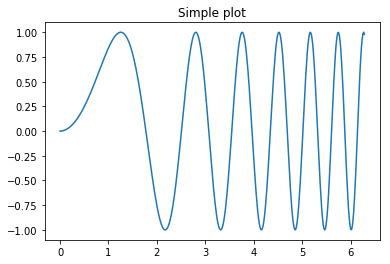

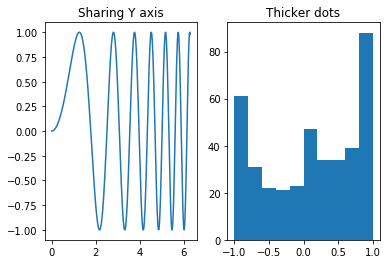

In [163]:
## EXPLANATIONS ON (SUB)PLOTTING

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

#Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.set_title('Thicker dots')
ax2.hist(y)


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Stijfheid 110005')

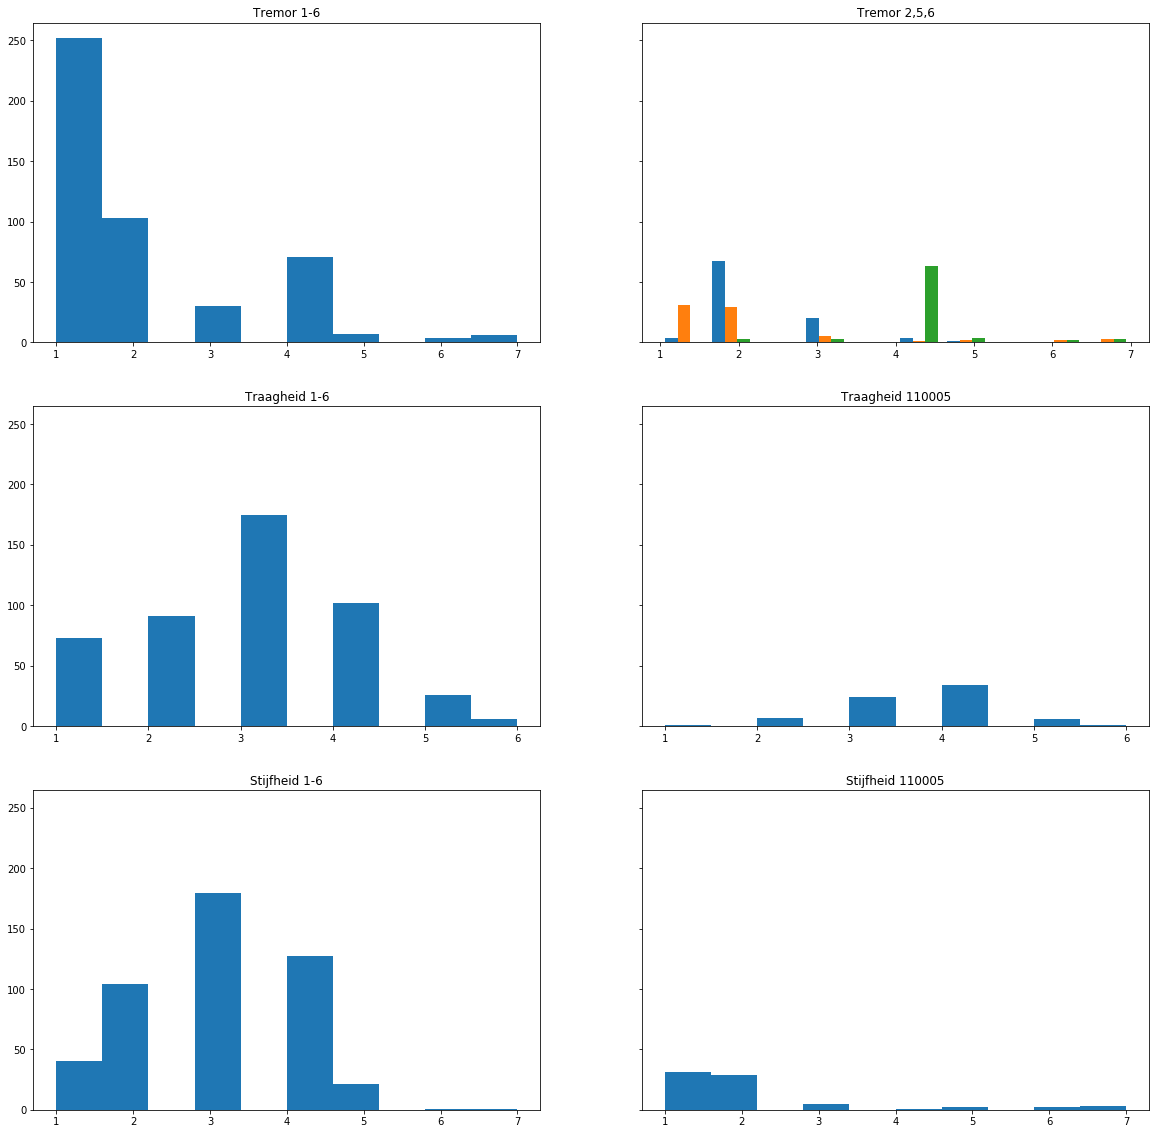

In [69]:
# visualize multiple sub-hist's
ID = 110005

f, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=False, figsize=(20,20))
# while creating subplots, all plots have to be given () per row
ax1.hist(esmValid['sanpar_tremor'])
ax1.set_title('Tremor 1-6')

ax2.hist((esmValid[esmValid['castorID']== (110002)]['sanpar_tremor'],esmValid[esmValid['castorID']== (110005)]['sanpar_tremor'] , esmValid[esmValid['castorID']== (110006)]['sanpar_tremor']))
ax2.set_title('Tremor 2,5,6')

# ax1 - ax2 counts per row, than next column. ax10: row 5, column 2.
ax3.hist(esmValid['sanpar_traag'])
ax3.set_title('Traagheid 1-6')

ax4.hist(esmValid[esmValid['castorID']==ID]['sanpar_traag'])
ax4.set_title(str('Traagheid '+str(ID)))

ax5.hist(esmValid['sanpar_stijf'])
ax5.set_title('Stijfheid 1-6')

ax6.hist(esmValid[esmValid['castorID']==ID]['sanpar_tremor'])
ax6.set_title(str('Stijfheid '+str(ID)))

Text(0.5,1,'Action without problems answers')

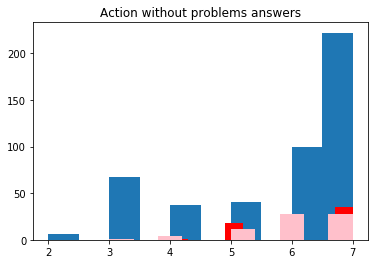

In [169]:
#plt.hist(esmValid['sanpar_onoff'])
plt.hist(esmValid['act_norpob'])
plt.hist(esmValid[esmValid['castorID']==110004]['act_norpob'], color='red') 
plt.hist(esmValid[esmValid['castorID']==110005]['act_norpob'], color='pink')


plt.title('Action without problems answers')


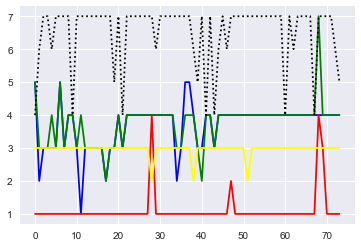

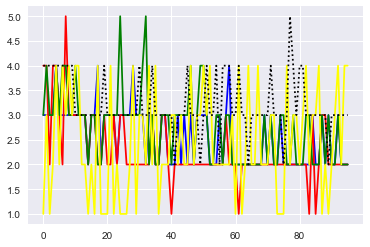

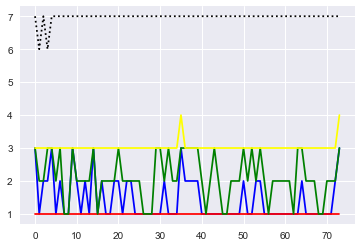

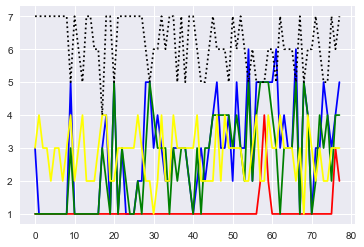

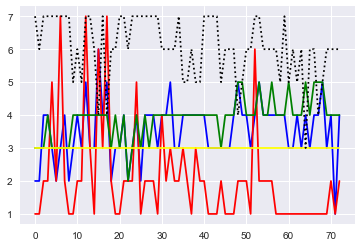

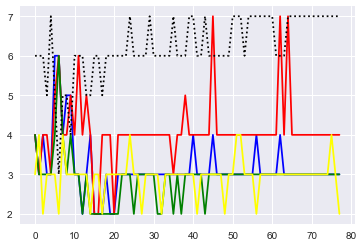

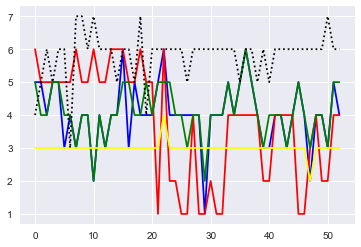

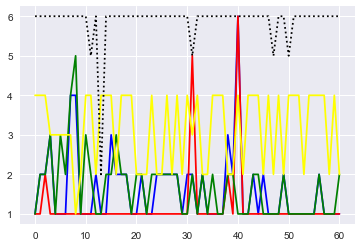

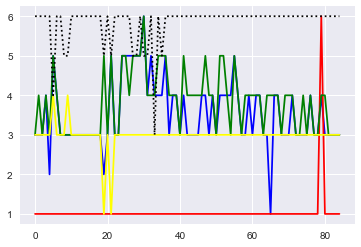

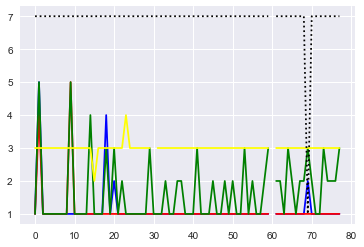

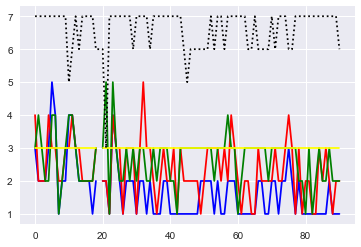

In [56]:
for id in range(esmValid['castorID'].nunique()):
    fig = plt.figure()
    ax = plt.axes()

    x = range(len(esmValid[esmValid['castorID']==(110001+id)]['sanpar_tremor']))
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['sanpar_traag'], color='blue')
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['sanpar_tremor'], color='red')
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['sanpar_stijf'], color='green')
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['sanpar_onoff'], color='yellow')
    plt.plot(x, esmValid[esmValid['castorID']==(110001+id)]['act_norpob'], color='black', linestyle='dotted');

In [ ]:
# next step, next to plotting variables, check for correlation coefficients
# do we have to analyse per day, within patients?

In [241]:
### Use Machine Learning to predict some variable from the esm

# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fitting the linear regression to the data
lr.fit(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values,esmFeatures['stress'])
# Looking at model parameters
# Regression weights
print('Weights are %f, %f, %f ' % (lr.coef_[0], lr.coef_[1], lr.coef_[2]))
# Intercept
print('Intercept is %f' % lr.intercept_)

# Predict target variable based on input data (should be unseen data)
prediction = lr.predict(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values)

Weights are 0.010902, -0.005863, 0.098696 
Intercept is -3.290468


NameError: name 'lr' is not defined

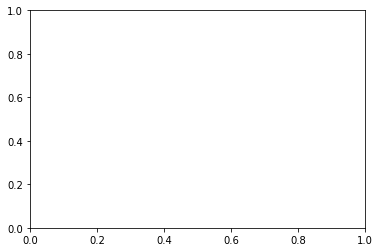

In [91]:
### Data visualization
# Bar plot
fig,ax = plt.subplots()
ax.bar(range(3), lr.coef_,color='r',width=0.4)
ax.bar(np.arange(3)+0.4, lr.coef_+0.01, color='b',width=0.4)
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Linear Regression Weights')
plt.xticks(range(3),['BandPowerXR','BandPowerYL', '#MovementsXL'])
plt.yticks(np.arange(0,0.1,0.02))
plt.savefig('weights.png',dpi=60)
plt.show()

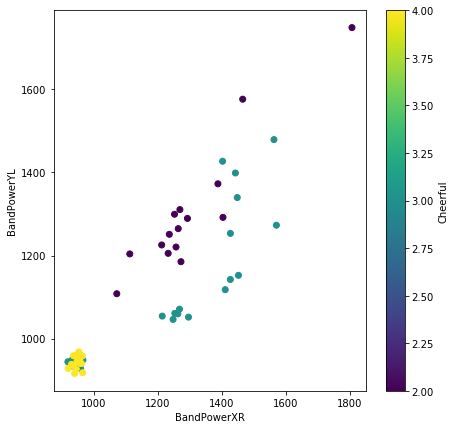

In [323]:
# Scatter Plot
feature1='BandPowerXR'
feature2='BandPowerYL'
fig, ax = plt.subplots(figsize=(7,7))
s1 = ax.scatter(esmFeatures[feature1], esmFeatures[feature2], c=esmFeatures['cheerful'])
plt.xlabel(feature1)
plt.ylabel(feature2)
fig.colorbar(s1,label='Cheerful')
plt.show()

(array([  4.,   0.,  15.,   0.,  30.,   0.,  20.,   0.,   4.,   2.]),
 array([  5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
          9.5,  10. ]),
 <a list of 10 Patch objects>)

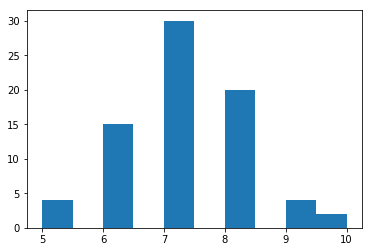

In [325]:
# Histogram
plt.hist(esmFeatures['#MovementsXR'])

In [326]:
# Principal Component Analysis
def pca(data):
    # Calculate Covariance Matrix
    cov=np.cov(data.T)
    # Calculate Eigenvalues and Eigenvectors
    w, v = np.linalg.eig(cov)
    # Sort them
    s= np.argsort(w)[::-1]
    return v[:,s]

/home/cherff/miniconda2/envs/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


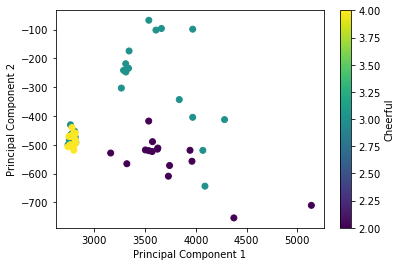

In [369]:
# Could also be done in only sensor/esm spaces
esmEigenVectors = pca(esmFeatures.values.astype(float))
transformedFeatureSpace =np.dot(esmEigenVectors[:,:2].T,esmFeatures.values.astype(float).T).T
s1 = plt.scatter(transformedFeatureSpace[:,0],transformedFeatureSpace[:,1],c=esmFeatures['cheerful'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(s1, label = 'Cheerful')
plt.show()

In [237]:
## It is very easy to use a more powerful Machine Learning algorithm

from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor()
# Fitting the regression model to our data
est.fit(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values,esmFeatures['stress'])

# Interpreting the model
print(est.feature_importances_)

# Predict target variable based on input data (should be unseen data)
prediction = est.predict(esmFeatures[['BandPowerXR','BandPowerYL', '#MovementsXL']].values)

[ 0.49260492  0.46772674  0.03966834]


In [222]:
from scipy.stats import spearmanr
r,p=spearmanr(alignedFeatures['AccX'].values.tolist(),alignedFeatures['cheerful'].values.tolist(),nan_policy='omit')
print(r,p)

-0.438833570413 8.205319799493544e-05


In [83]:
######### Exploring the sensor data

signal_labels, timeStamps, data, sr = readData(leftWristFile)

#filtData = filter_data(data, sr, 4,8)

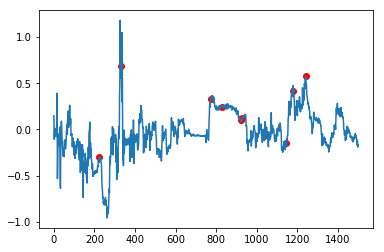

[ 224  329  775  829  921  928 1040 1045 1145 1180 1241]


In [247]:
#Extract some sort of feature for all windows and corresponding time stamps
# Peak detection


channel=3
numSamples=data.shape[1]
windowLength=60

win=0
windowData = data[:,win:win+featureWindowLength*sr]

peaks=find_peaks_cwt(windowData[channel,:],np.arange(40,50))

#Maximum for bradykinesia recognition
mMovement = np.max(windowData[3:6,:])
numberOfPeaks = len(peaks)
averageDuration = np.mean(np.diff(peaks))/sr


plt.plot(windowData[channel,:])
plt.scatter(peaks,windowData[channel,peaks],c='r')
plt.show()
print(peaks)

In [281]:
### Experiments with Orientation estimation
signal_labels, timeStamps, sigbufs, sr = readData(leftWristFile)

In [287]:
### Transform Gyro data into orientation estimation
from madgwickahrs import MadgwickAHRS
mw = MadgwickAHRS(sampleperiod=1/sr)
euler = np.zeros((3,sigbufs.shape[1]))
for sample in range(sigbufs.shape[1]):
    mw.update_imu(sigbufs[6:,sample],sigbufs[3:6,sample])
    euler[:,sample] = mw.quaternion.to_euler123()

/home/cherff/workspace/ADBS/quaternion.py:97: RuntimeWarning: invalid value encountered in arcsin
  pitch = np.arcsin(2*(self[1]*self[3] + self[0]*self[1]))


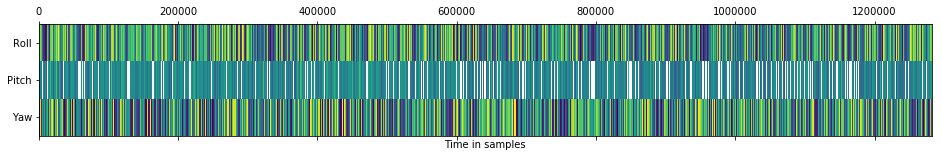

In [298]:
plt.matshow(euler,aspect='auto')
plt.yticks([0,1,2],['Roll', 'Pitch', 'Yaw'])
plt.xlabel('Time in samples')
plt.show()